# HW5

Miembros del grupo:
- Pablo Carmona
- Javier Sendra

In [2]:
! pip install matplotlib

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read data

In [30]:
df = pd.read_csv('prosperLoanData_train.csv')
df_oot = pd.read_csv('prosperLoanData_oot.csv')

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/1126015950.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('prosperLoanData_train.csv')


In [31]:
df.groupby('bad').size()

bad
False    15927
True      1060
dtype: int64

## Differenciate between usable features and other columns

In [32]:
! pip install openpyxl

In [33]:
df_columns = pd.read_excel("Clasificacion_columnas_HW4.xlsx")
drop = df_columns.loc[df_columns["Keep/Drop"]=="Drop"]

In [34]:
features = [c for c in df.columns if c not in drop.Column.values]
col_target = 'bad'

In [35]:
features

['ListingCreationDate',
 'Term',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'IncomeRange',
 'IncomeVerifiable',
 'StatedMonthlyIncome',
 '

## Data exploration

El primer enfoque que le daremos a nuestras variables será el conocer el tipo de variables que son.
- Por una parte, observamos que muchas variables son de tipo *float64*, las cuales serán como **variables numéricas**
- Por otra parte, observamos que otras variables son de tipo *object* o incluso *booleanos*, las cuales serán **variables categóricas**

In [36]:
df[features].dtypes

ListingCreationDate                object
Term                                int64
ClosedDate                         object
BorrowerAPR                       float64
BorrowerRate                      float64
                                   ...   
LoanMonthsSinceOriginationY       float64
LoanFirstDefaultedCycleNumberQ    float64
fraud                                bool
bad                                  bool
LoanOriginationYear                 int64
Length: 75, dtype: object

Establecemos una disgregación de variables, para ello separemos aquellas variables que sean categóricas de las que sean numéricas y sobre ellas realizaremos un análisis estadístico descriptivo para ir comparándo unas con las otras e intrepetar los resultados estadísticamente más significativos

In [37]:
cat_features = [f for f, b in zip(features, df[features].dtypes == object) if b==True]
num_features = [f for f in features if f not in cat_features]

In [38]:
df[num_features].describe().transpose()

count          mean           std  \
Term                                 16987.0     38.547360      9.553738   
BorrowerAPR                          16987.0      0.251439      0.091004   
BorrowerRate                         16987.0      0.220769      0.084128   
LenderYield                          16987.0      0.210756      0.084137   
EstimatedEffectiveYield              16897.0      0.181165      0.082283   
EstimatedLoss                        16897.0      0.093394      0.055218   
EstimatedReturn                      16897.0      0.110674      0.037541   
ProsperScore                         16897.0      6.408830      2.294022   
ListingCategory (numeric)            16987.0      3.840290      4.103710   
EmploymentStatusDuration             16982.0     90.379225     89.131565   
CreditScoreRangeLower                16987.0    701.827280     53.510729   
CreditScoreRangeUpper                16987.0    720.827280     53.510729   
CurrentCreditLines                   16987.0      9.443398      5.285003   
OpenCreditLines                      16987.0      8.326485      4.740277   
TotalCreditLinespast7years           16987.0     26.197857     13.843854   
OpenRevolvingAccounts                16987.0      6.372402      4.224160   
OpenRevolvingMonthlyPayment          16987.0    355.054630    411.553102   
InquiriesLast6Months                 16987.0      1.121740      1.611185   
TotalInquiries                       16987.0      4.382528      4.150007   
CurrentDelinquencies                 16987.0      0.400012      1.234987   
AmountDelinquent                     16987.0   1030.348384   6715.581776   
DelinquenciesLast7Years              16987.0      3.531760      8.866966   
PublicRecordsLast10Years             16987.0      0.264908      0.630288   
PublicRecordsLast12Months            16987.0      0.013893      0.128097   
RevolvingCreditBalance               16987.0  15975.778537  31902.850668   
BankcardUtilization                  16987.0      0.521266      0.329189   
AvailableBankcardCredit              16987.0  10711.684582  18887.303459   
TotalTrades                          16987.0     22.520575     12.107445   
TradesNeverDelinquent (percentage)   16987.0      0.890626      0.132000   
TradesOpenedLast6Months              16987.0      0.718432      1.048462   
DebtToIncomeRatio                    14988.0      0.247142      0.387900   
StatedMonthlyIncome                  16987.0   5516.876572   6563.539084   
TotalProsperLoans                     5525.0      1.356018      0.663346   
TotalProsperPaymentsBilled            5525.0     24.036018     17.195251   
OnTimeProsperPayments                 5525.0     23.323258     16.785430   
ProsperPaymentsLessThanOneMonthLate   5525.0      0.654661      2.355186   
ProsperPaymentsOneMonthPlusLate       5525.0      0.058100      0.594500   
ProsperPrincipalBorrowed              5525.0   6928.957135   6010.112640   
ProsperPrincipalOutstanding           5525.0   1961.604362   2726.631678   
ScorexChangeAtTimeOfListing           5500.0     -0.485636     53.222908   
LoanCurrentDaysDelinquent            16987.0     90.687173    238.115316   
LoanFirstDefaultedCycleNumber         2788.0     16.130560      7.676694   
LoanMonthsSinceOrigination           16987.0     32.822217      9.682092   
LoanOriginalAmount                   16987.0   6411.536999   4651.258896   
MonthlyLoanPayment                   16987.0    227.743995    148.980877   
LP_CustomerPrincipalPayments         16987.0   4536.579370   4036.529755   
LP_InterestandFees                   16987.0   1549.127113   1360.645982   
LP_ServiceFees                       16987.0    -76.179752     72.158461   
LP_CollectionFees                    16987.0    -17.073717    100.404108   
LP_GrossPrincipalLoss                16987.0    765.781950   2240.302389   
LP_NetPrincipalLoss                  16987.0    745.320912   2208.345282   
LP_NonPrincipalRecoverypayments      16987.0     17.343256    169.408580   
PercentFund

In [39]:
df[cat_features].describe().transpose()

count unique                            top   freq
ListingCreationDate      16987  16987  2011-12-08 14:14:48.073000000      1
ClosedDate               11864   1383            2012-10-30 00:00:00     44
ProsperRating (Alpha)    16897      7                              D   3755
BorrowerState            16987     48                             CA   2135
Occupation               16987     67                          Other   4460
EmploymentStatus         16987      7                       Employed  10647
DateCreditPulled         16987  16983            2011-12-05 07:17:32      2
FirstRecordedCreditLine  16987   6428            1993-12-01 00:00:00     40
IncomeRange              16987      7                 $25,000-49,999   5420
LoanOriginationDate      16987    741                     2011-08-31    125
LoanOriginationQuarter   16987     13                        Q2 2012   3094

### Custom Pandas describing

**TODO 1** Crea una función que cumpla con la funcionalidad descrita en la cabecera de la función desc_num

In [40]:
def desc_num(df, df_oot):

    results = {}

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        results[col] = {}
        results[col]['Mean'] = df[col].mean()
        results[col]['Median'] = df[col].median()
        results[col]['Minimum'] = df[col].min()
        results[col]['Maximum'] = df[col].max()
        results[col]['25th Percentile (p25)'] = df[col].quantile(0.25)
        results[col]['75th Percentile (p75)'] = df[col].quantile(0.75)
        results[col]['Standard Deviation (std)'] = df[col].std()
        results[col]['Percentage of Missing Values (%na)'] = (df[col].isnull().mean() * 100)
        results[col]['Percentage of Non-Zero Values (%nonzero)'] = (df[col].astype(bool).sum() / len(df) * 100)
        results[col]['Percentage of Unique Values (%unique)'] = (len(df[col].unique()) / len(df) * 100)

        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        axs[0].hist(df[col], bins=20, color='blue', alpha=0.7, label='In-Time')
        axs[0].hist(df_oot[col], bins=20, color='red', alpha=0.7, label='Out-of-Time')
        axs[0].set_title('Histogram')
        axs[0].set_xlabel(col)
        axs[0].legend()

        sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
        sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])
        axs[1].set_title('Stability Plot')
        axs[1].set_xlabel(col)
        axs[1].legend()

        plt.show()

    return results

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


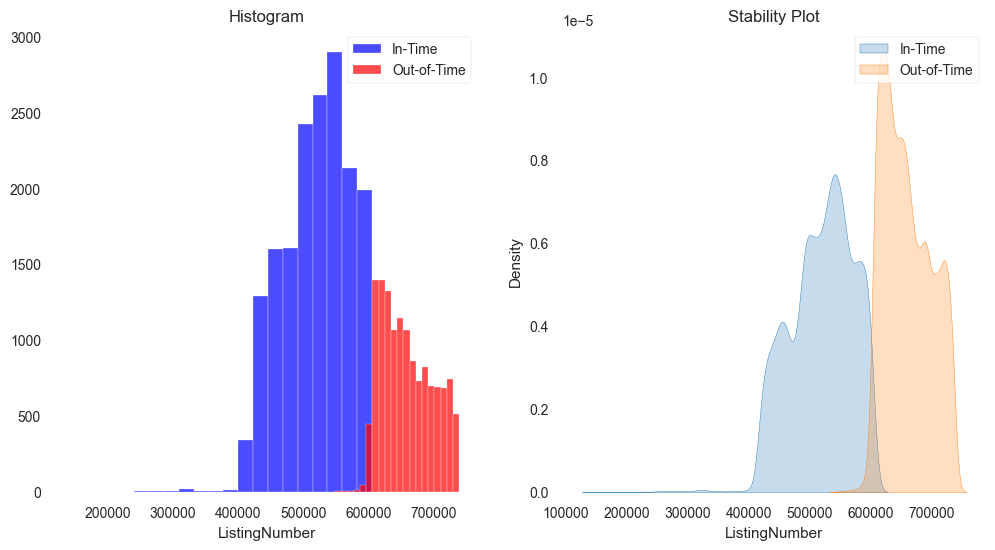

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


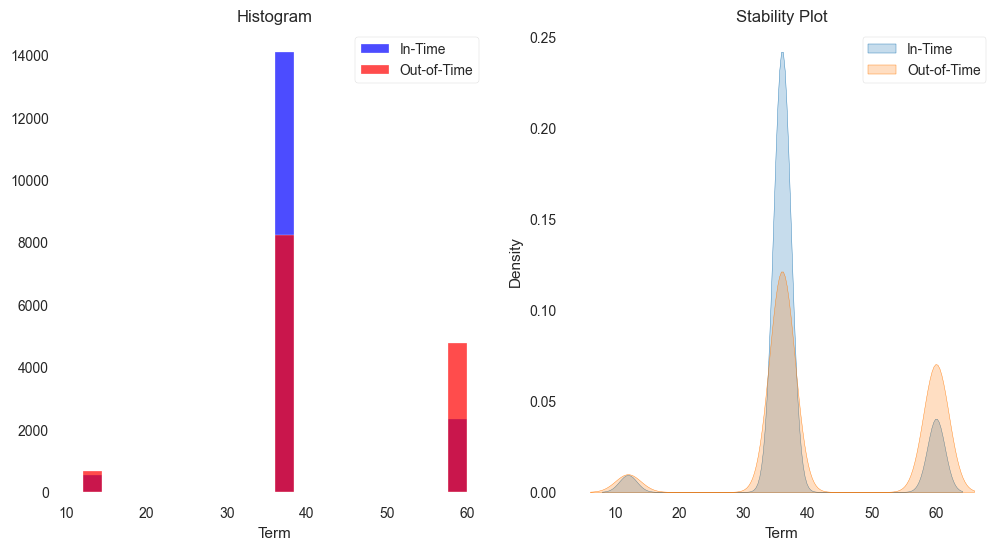

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


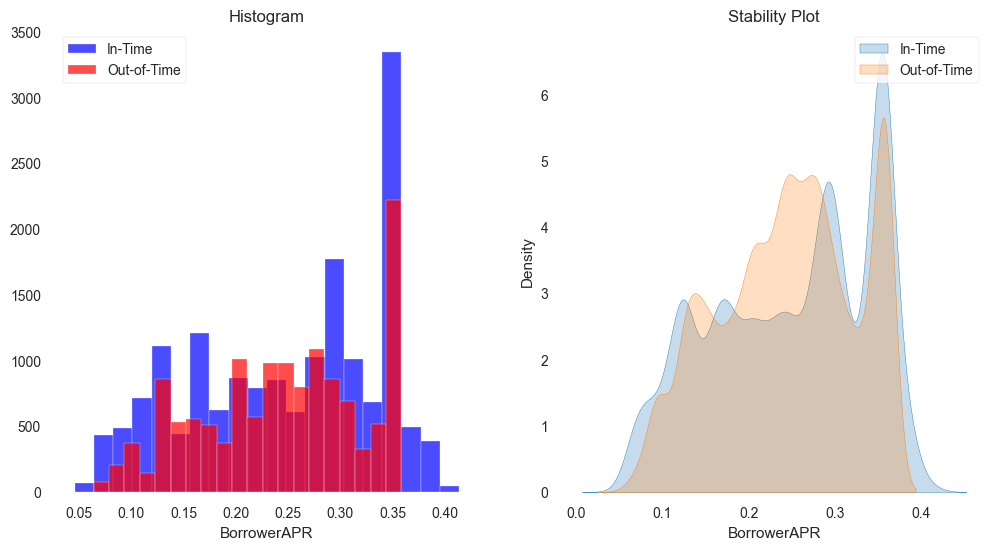

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


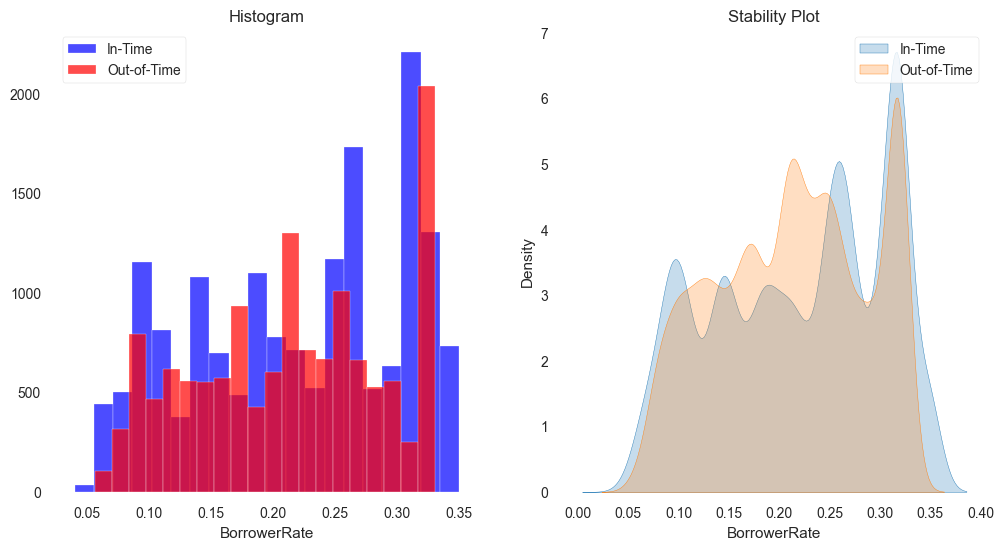

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


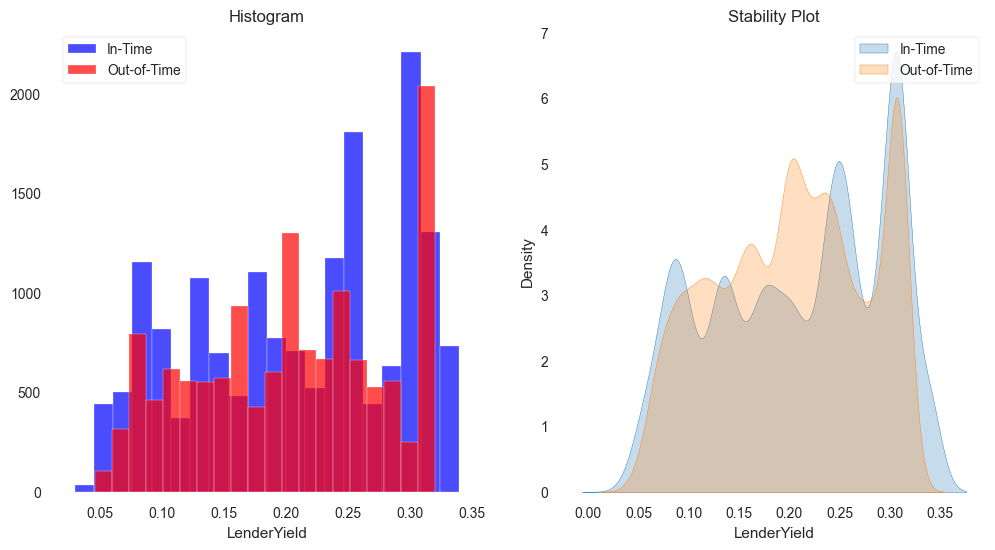

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


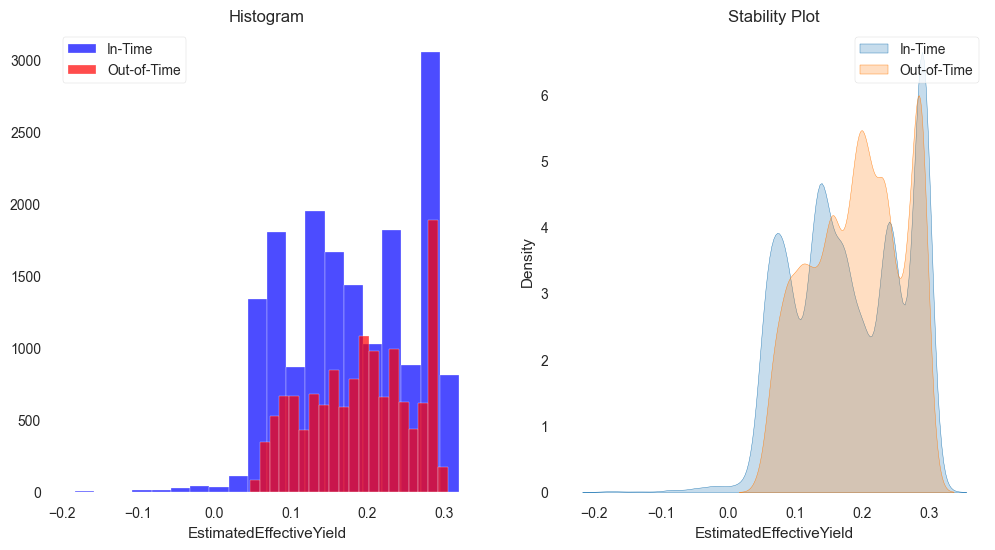

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


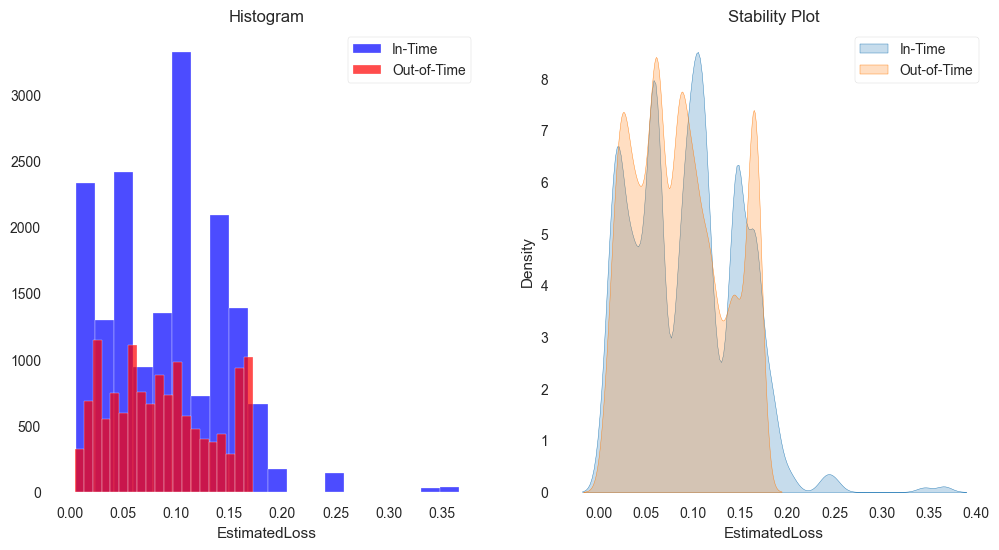

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


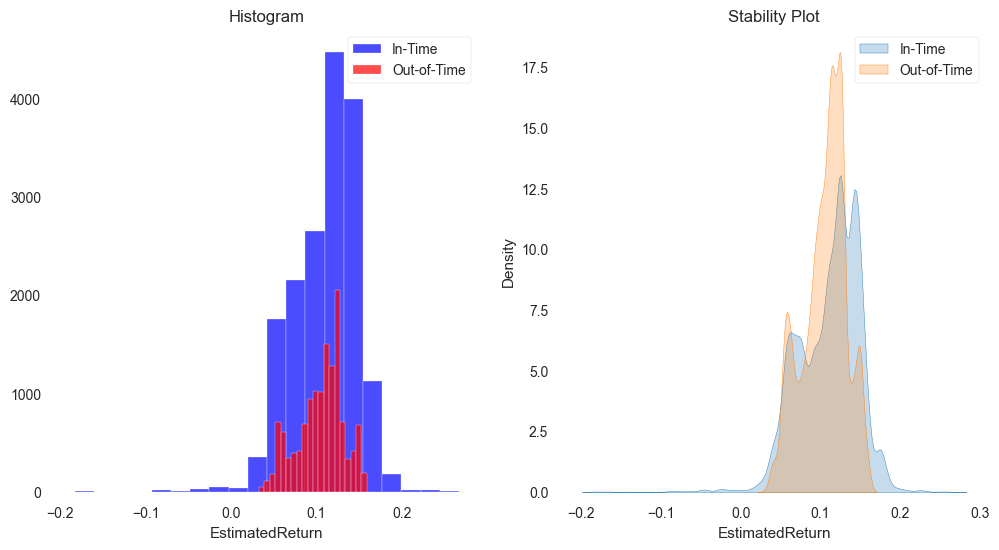

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


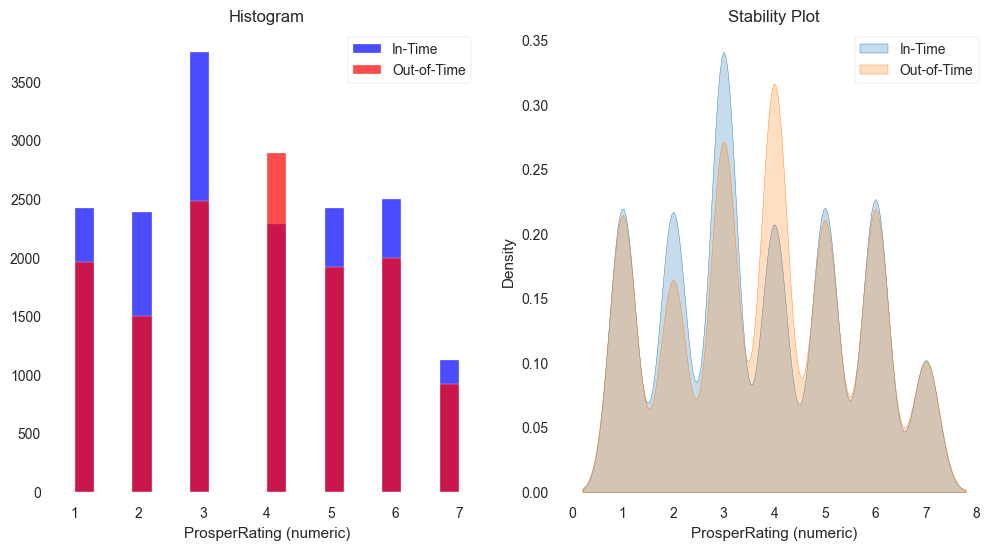

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


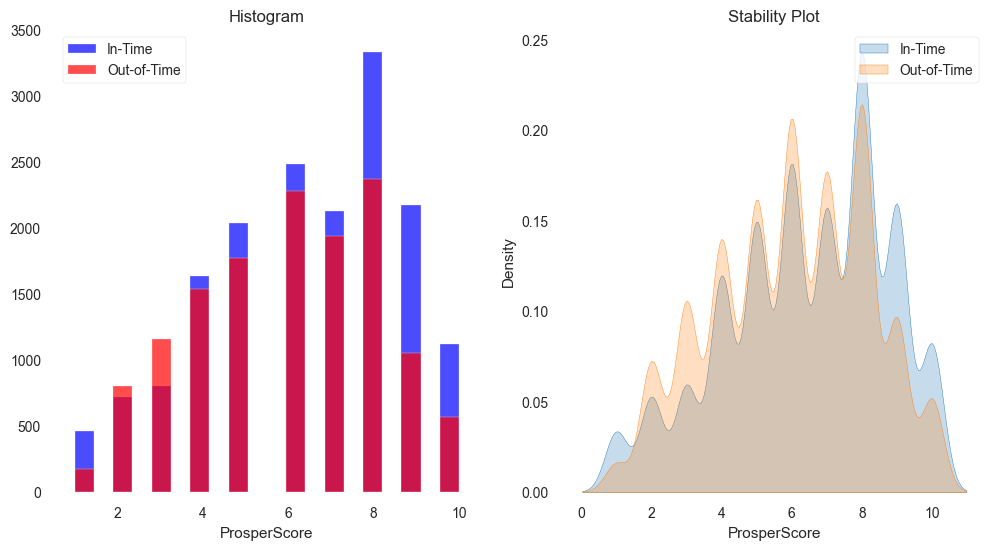

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


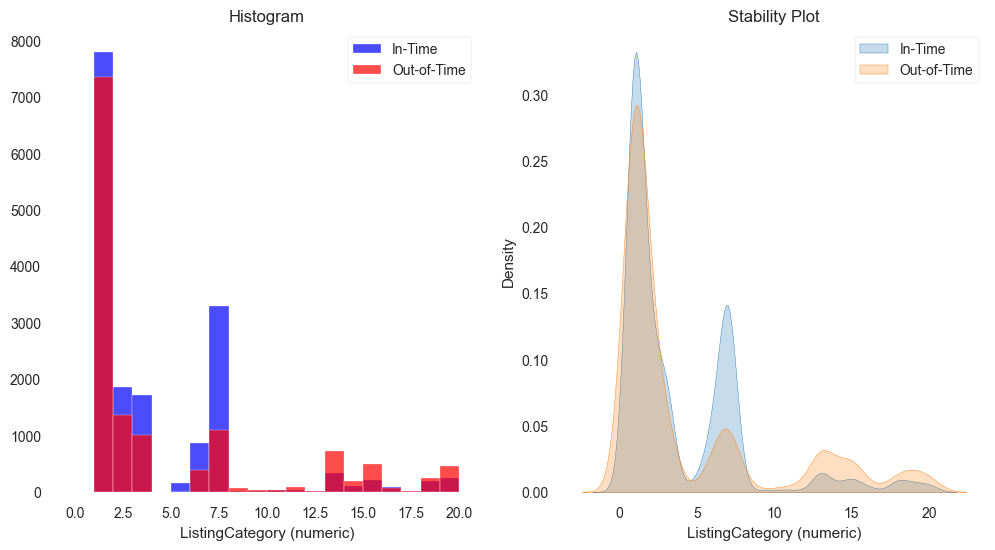

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


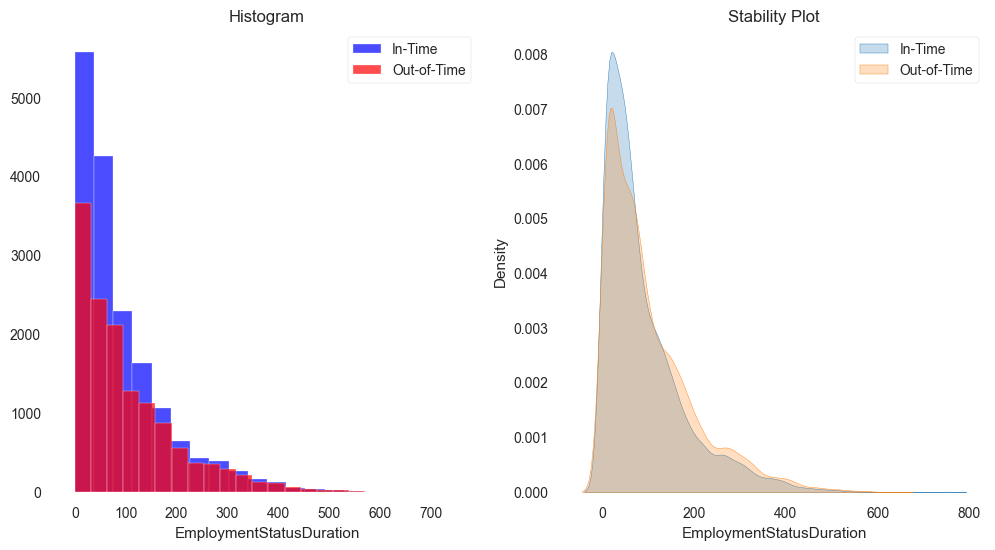

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


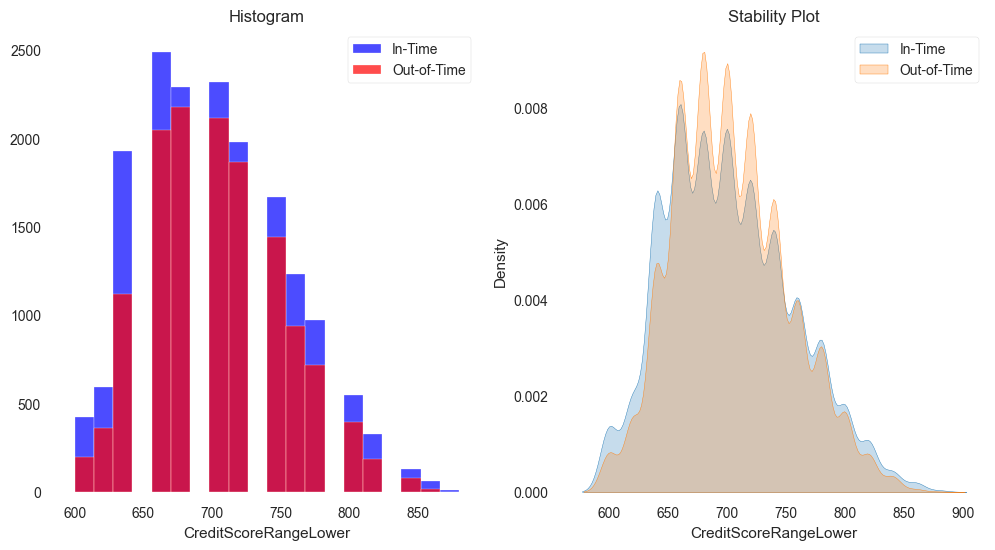

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


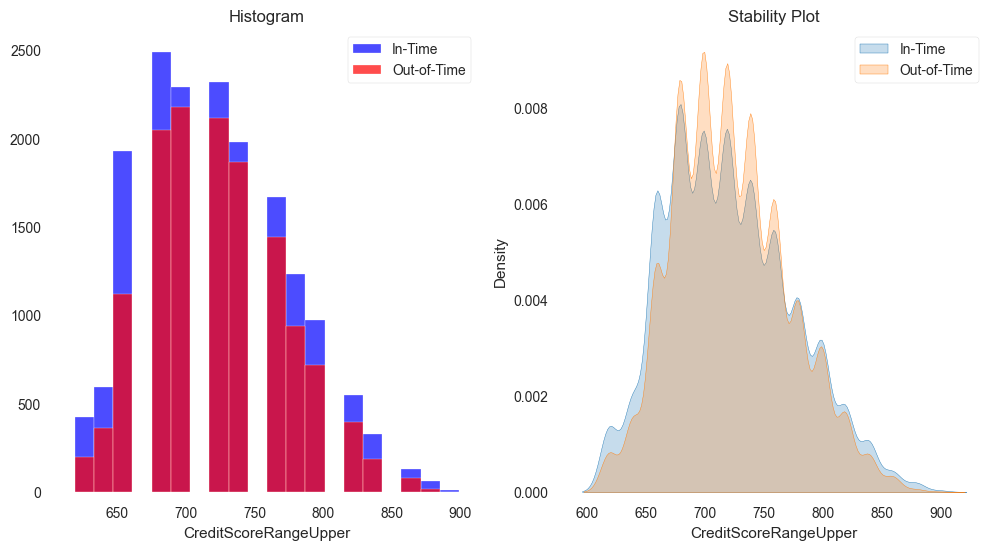

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


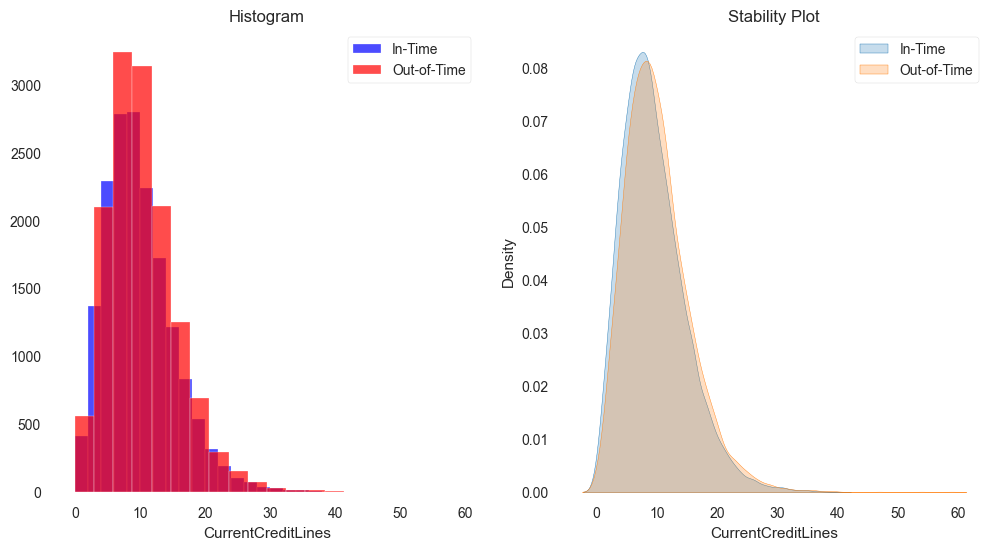

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


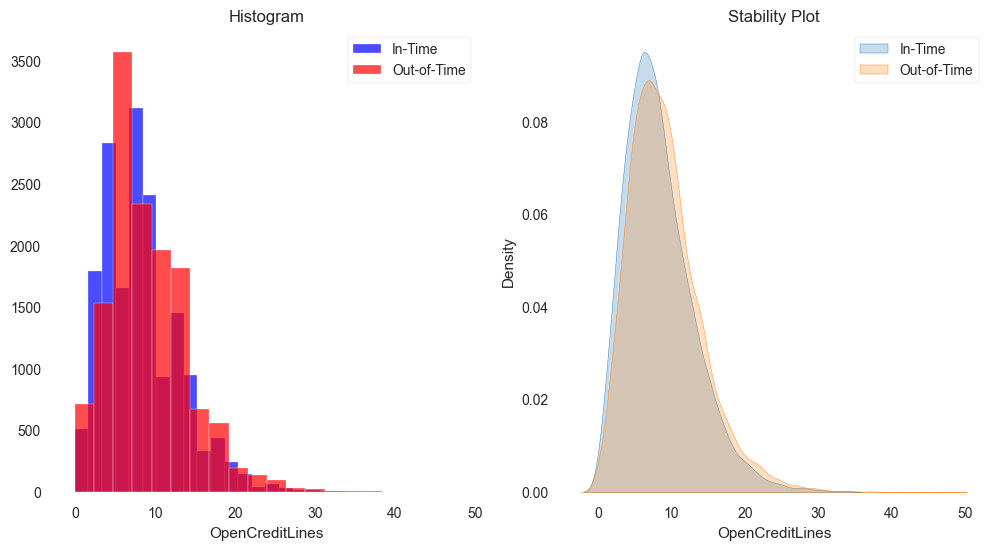

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


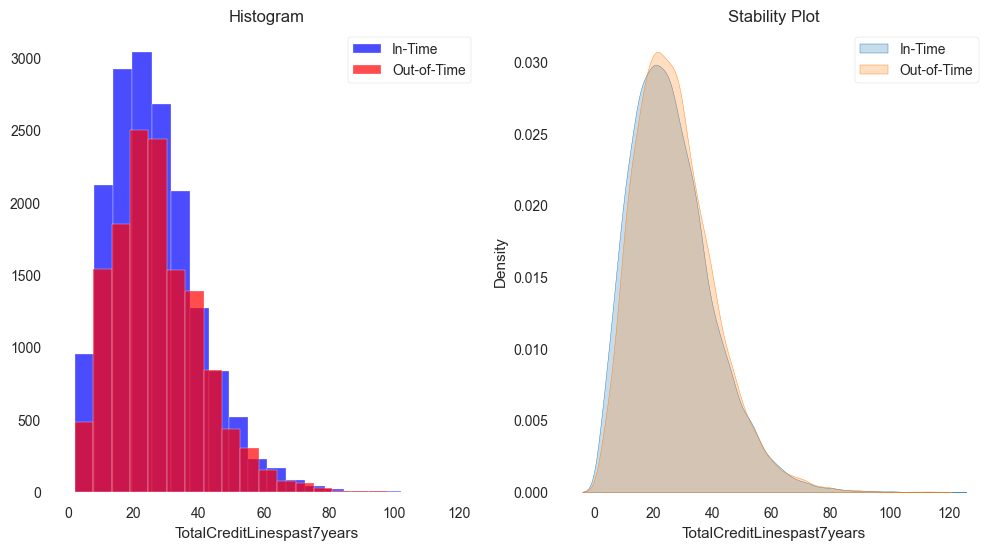

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


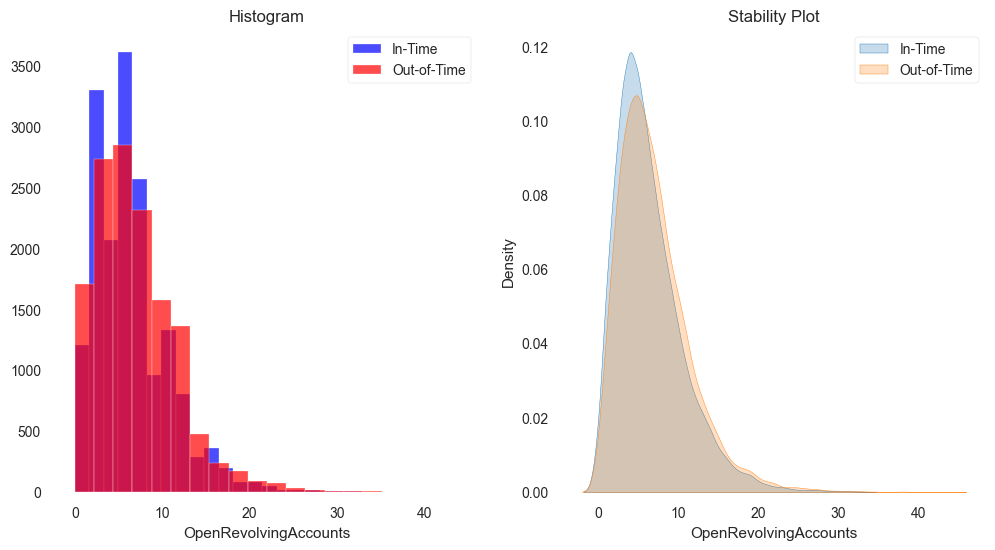

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


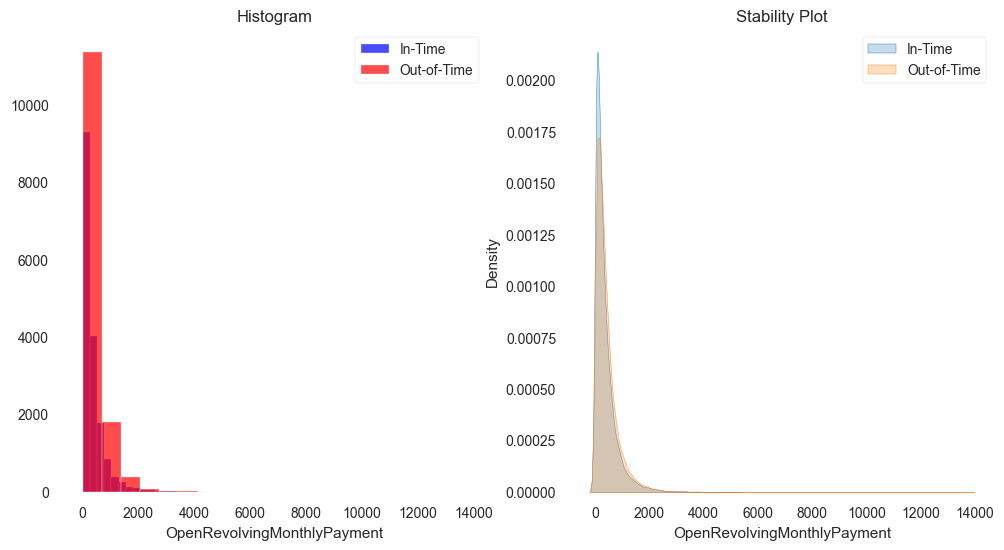

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


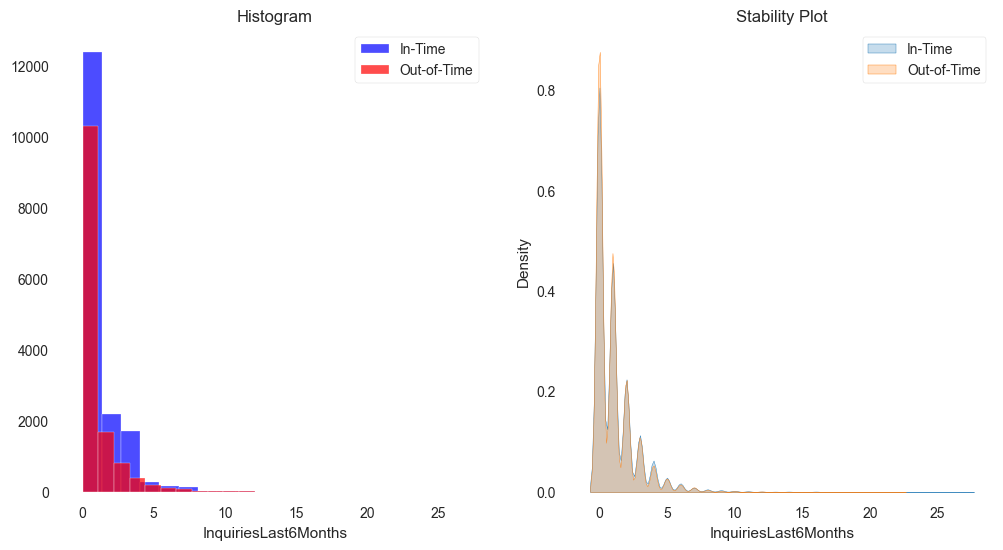

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


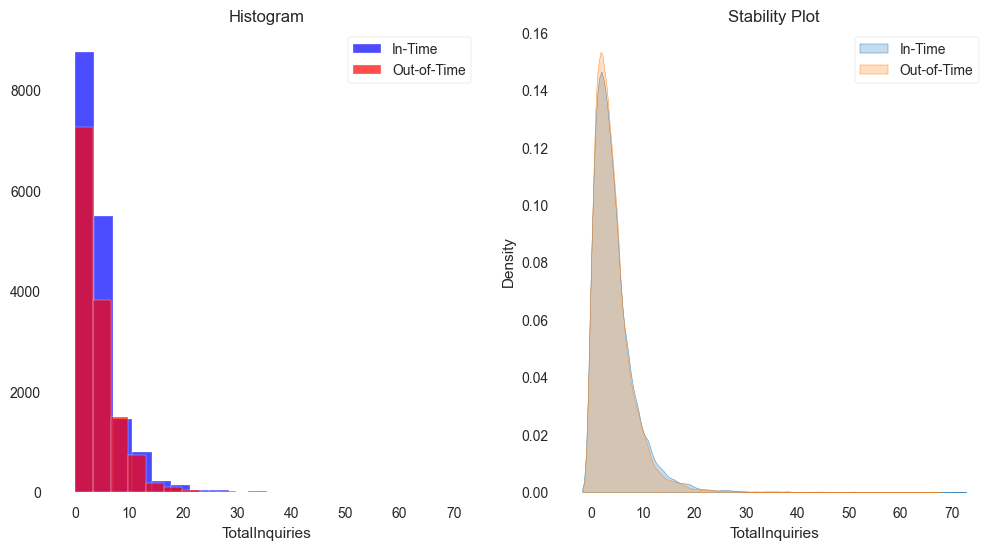

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


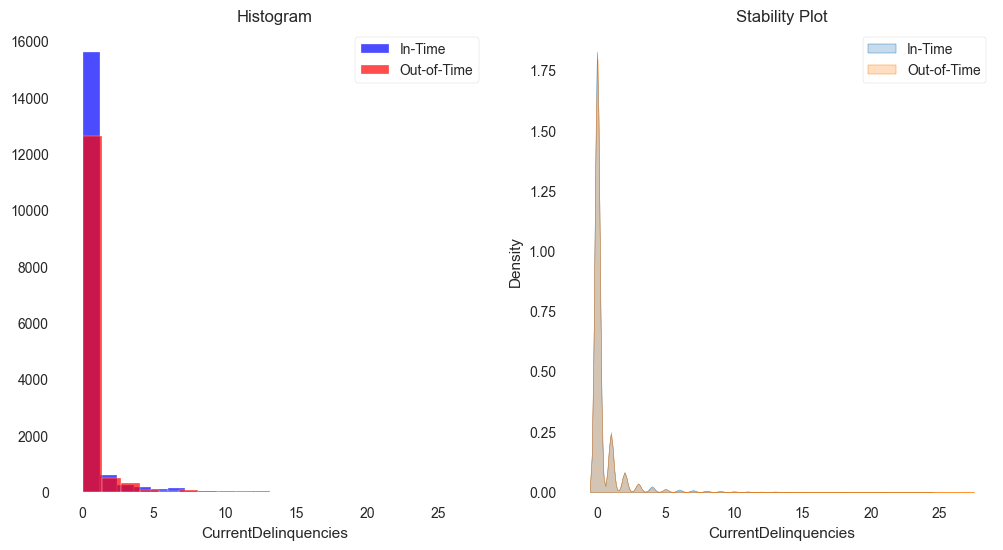

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


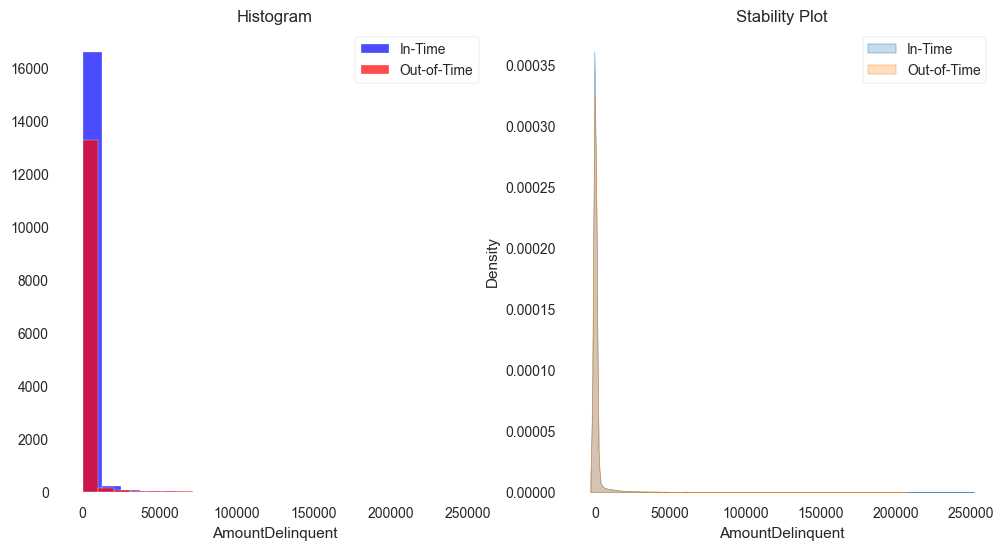

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


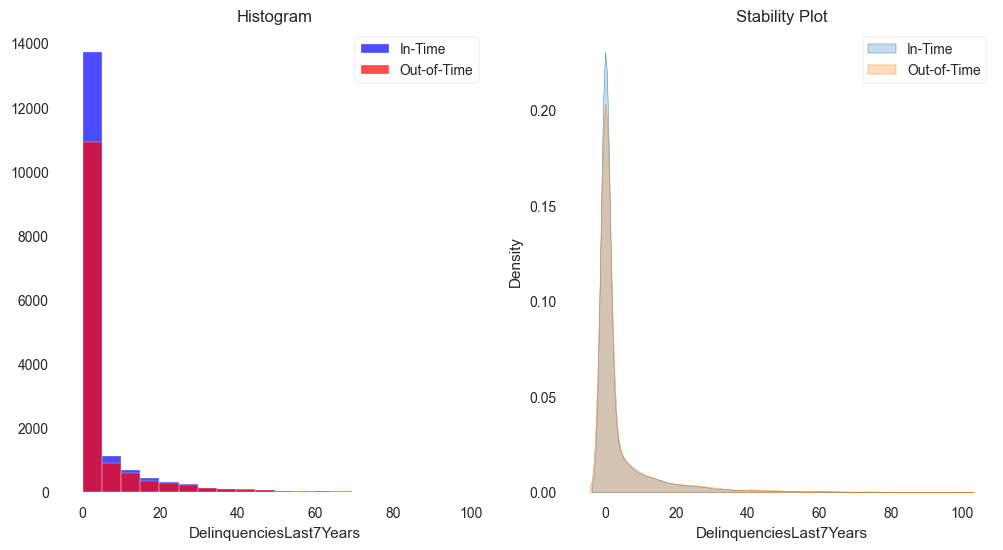

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


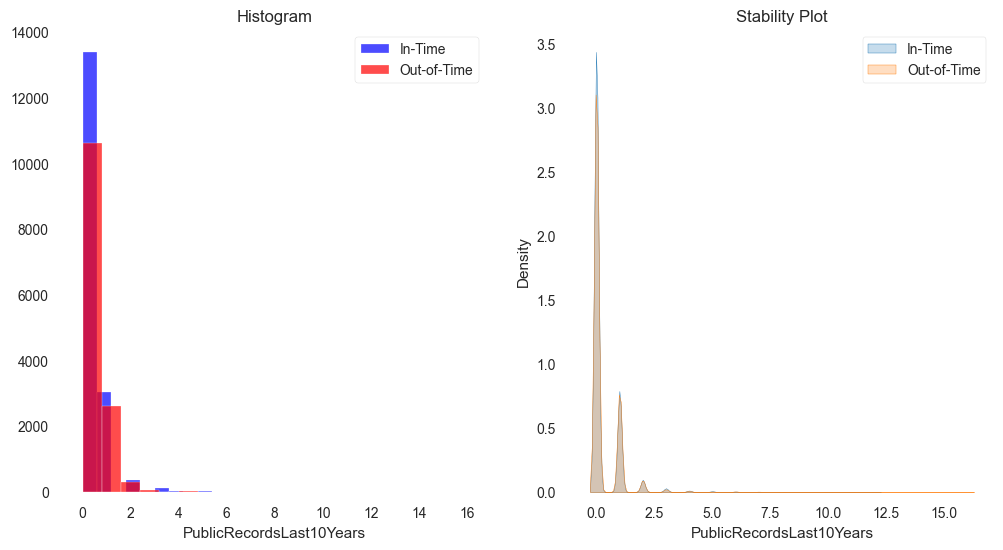

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


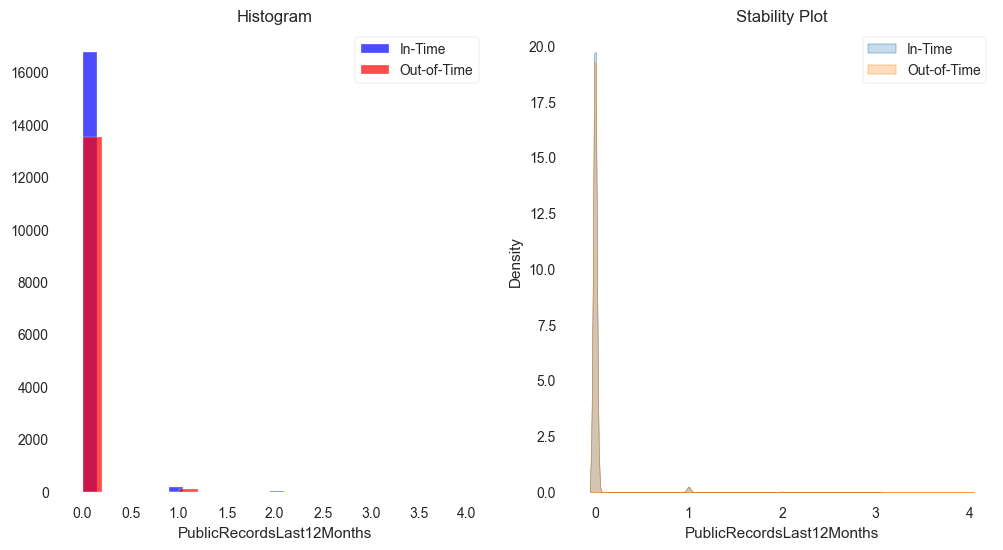

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


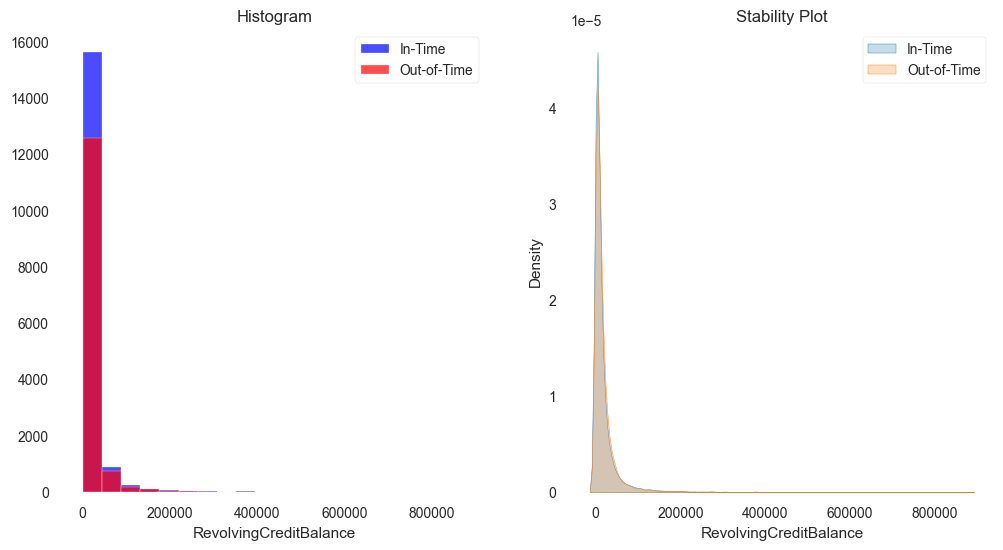

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


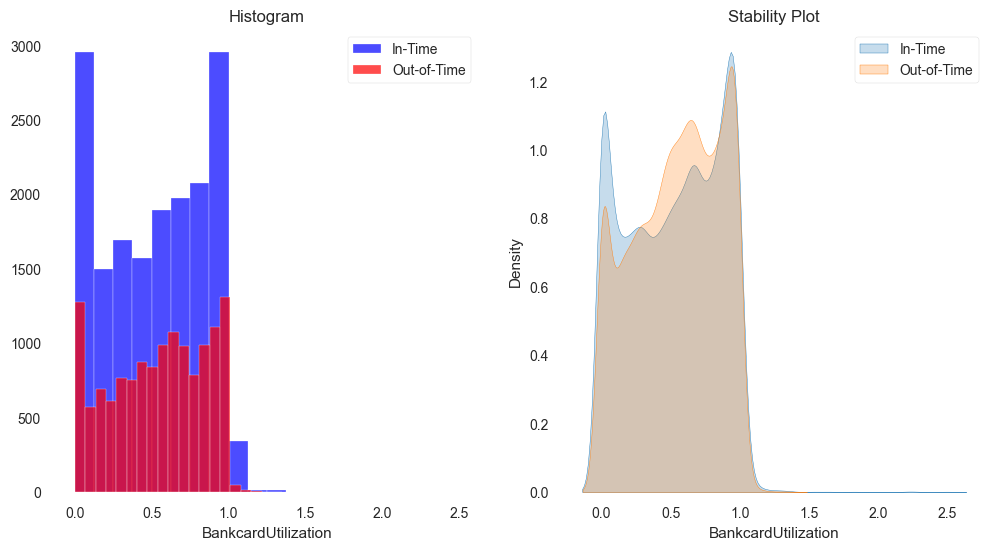

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


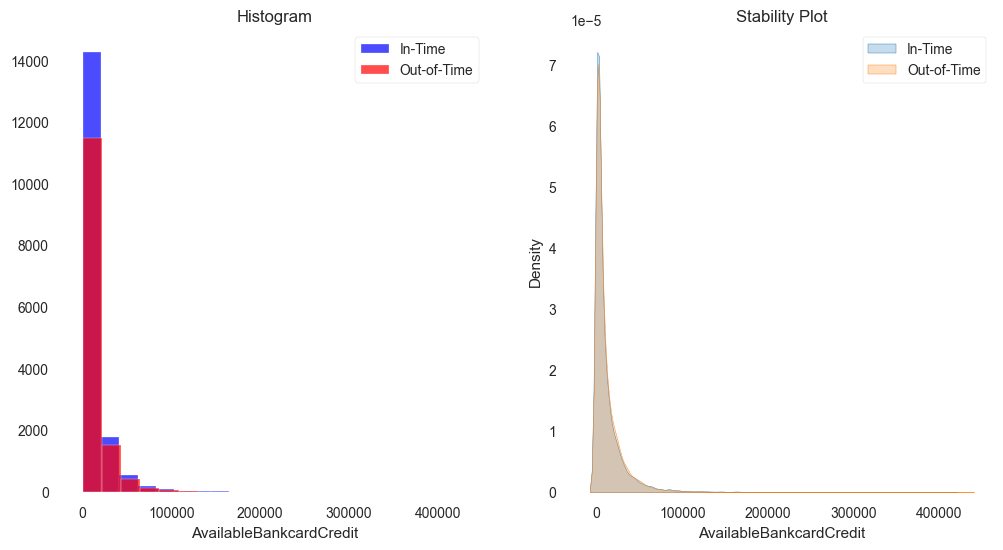

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


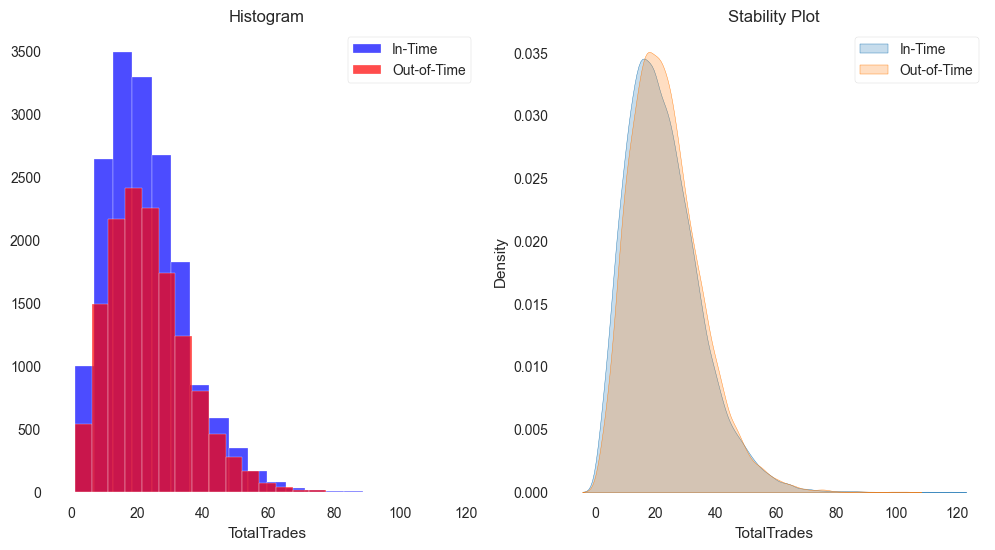

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


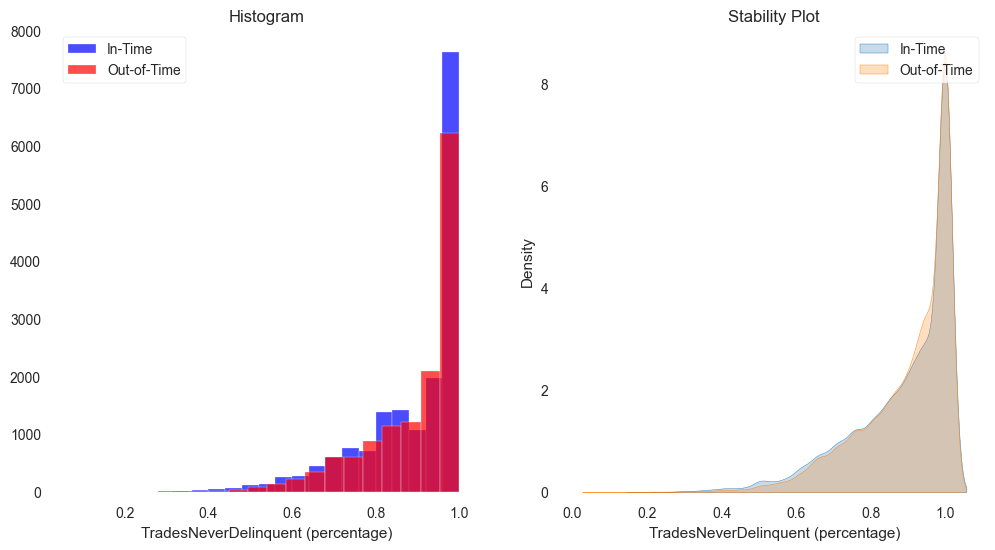

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


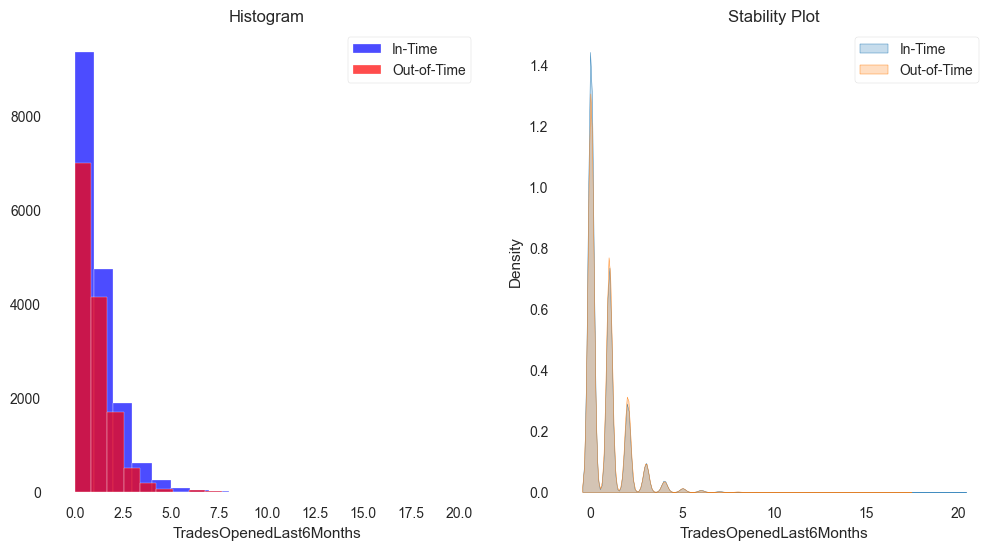

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


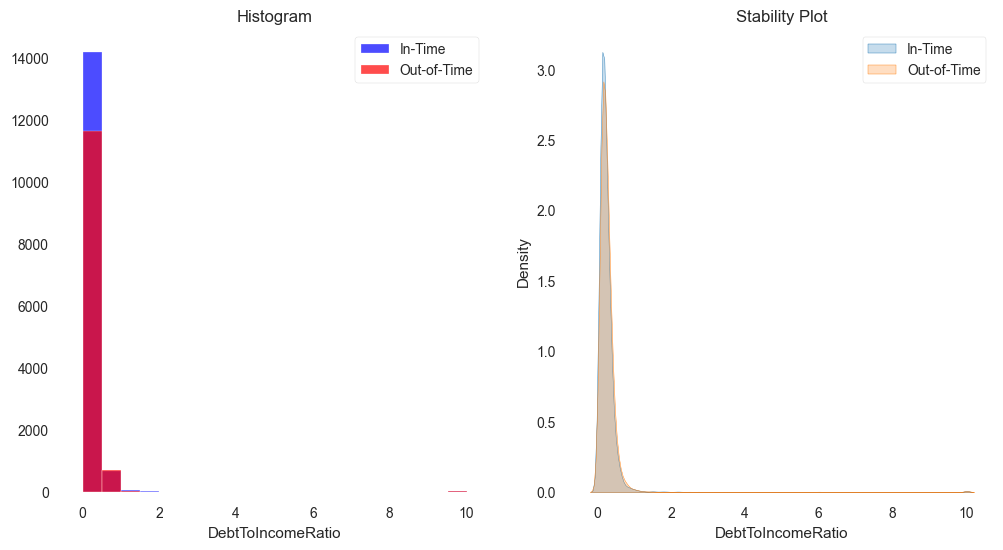

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


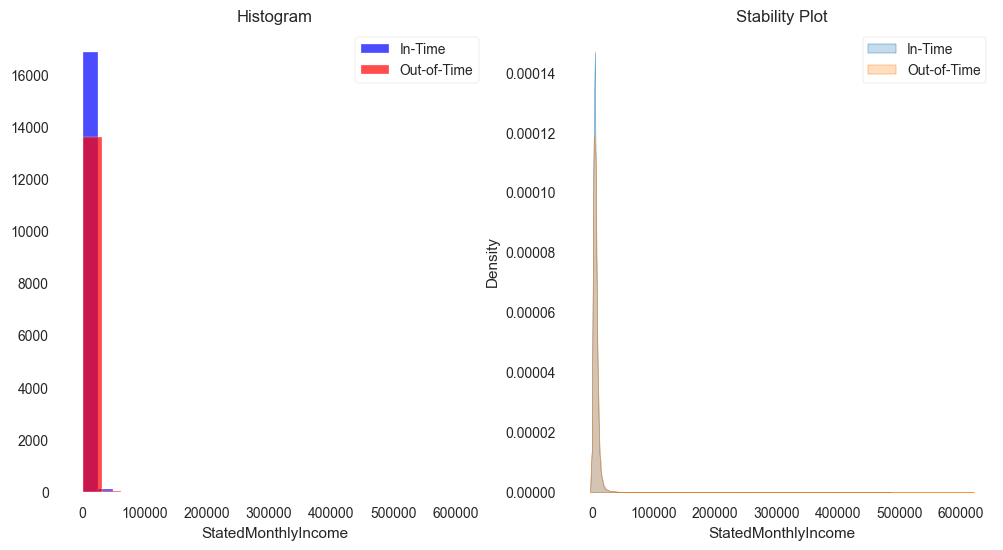

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


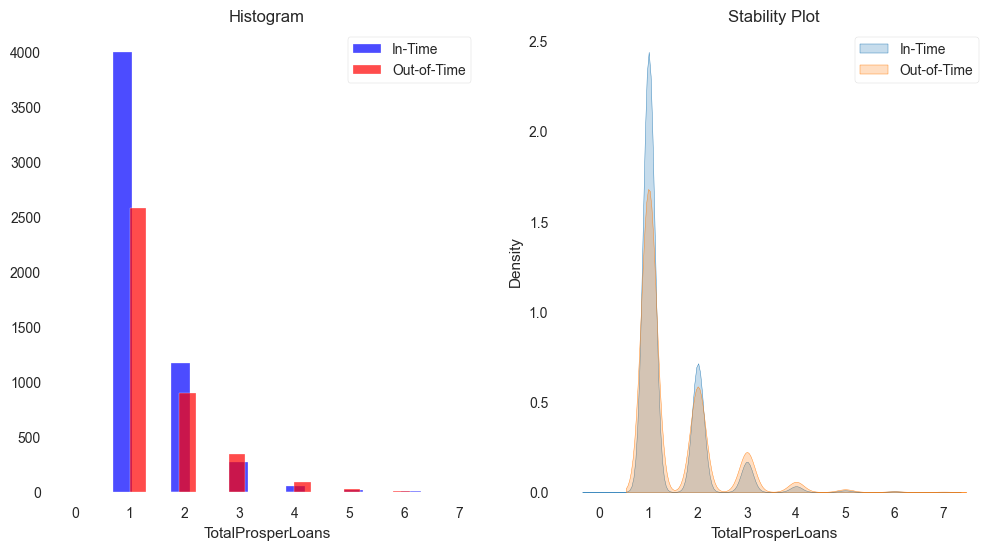

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


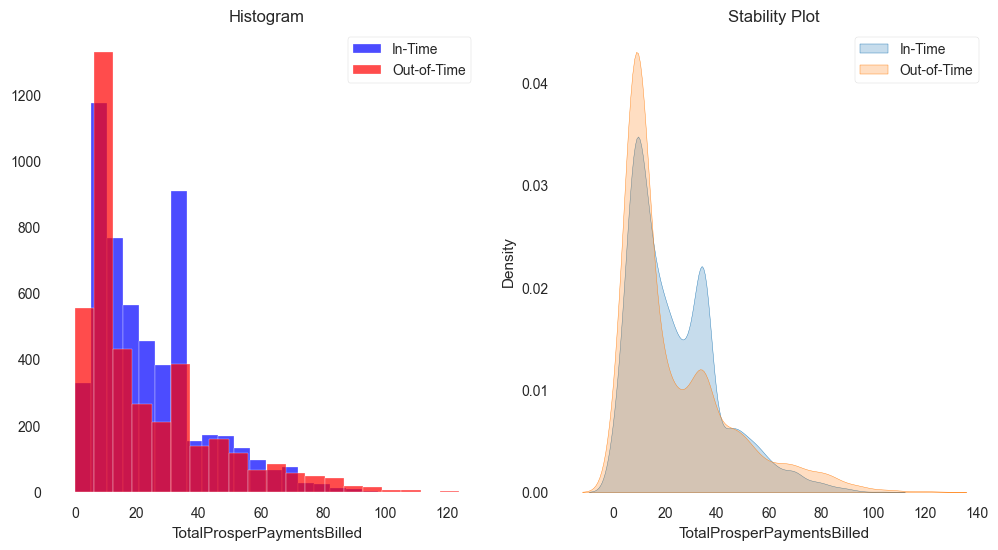

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


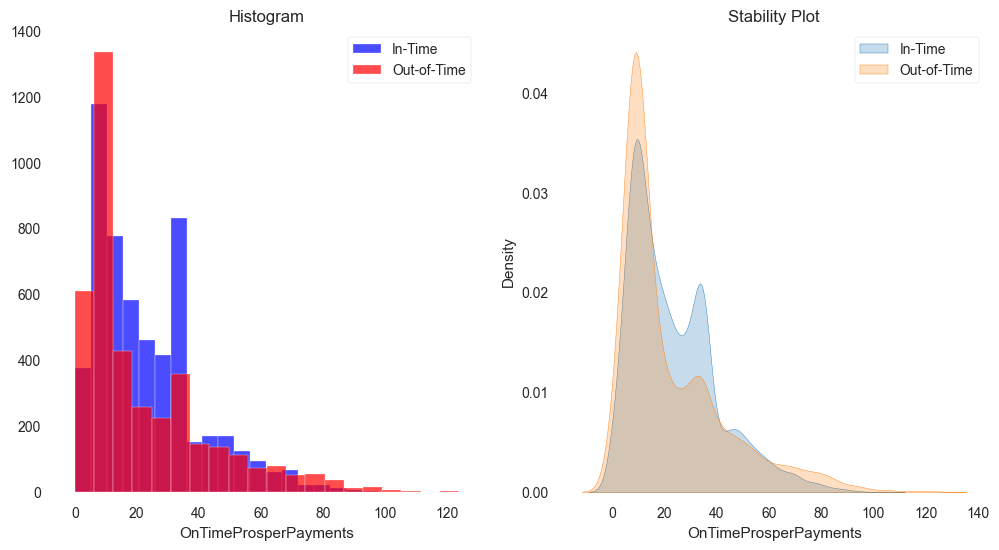

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


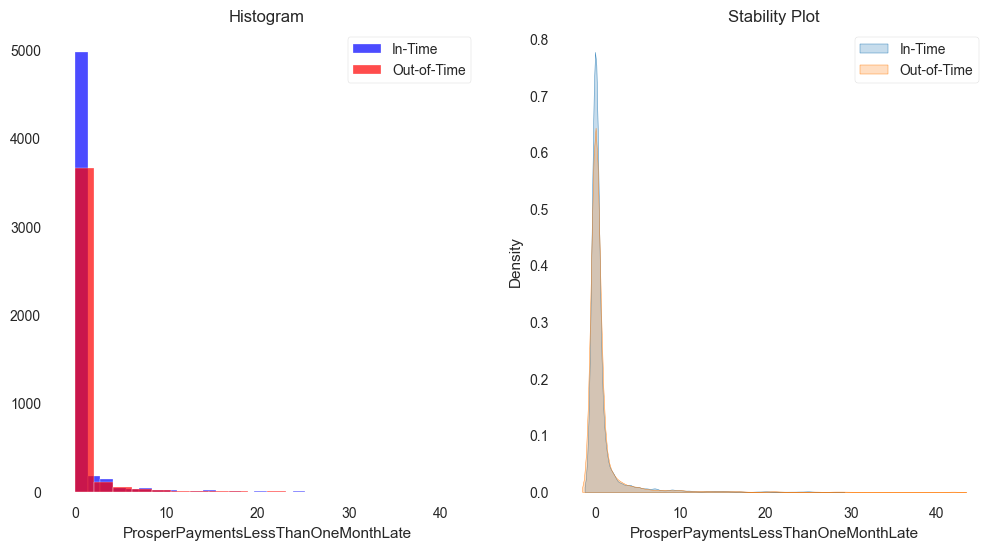

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


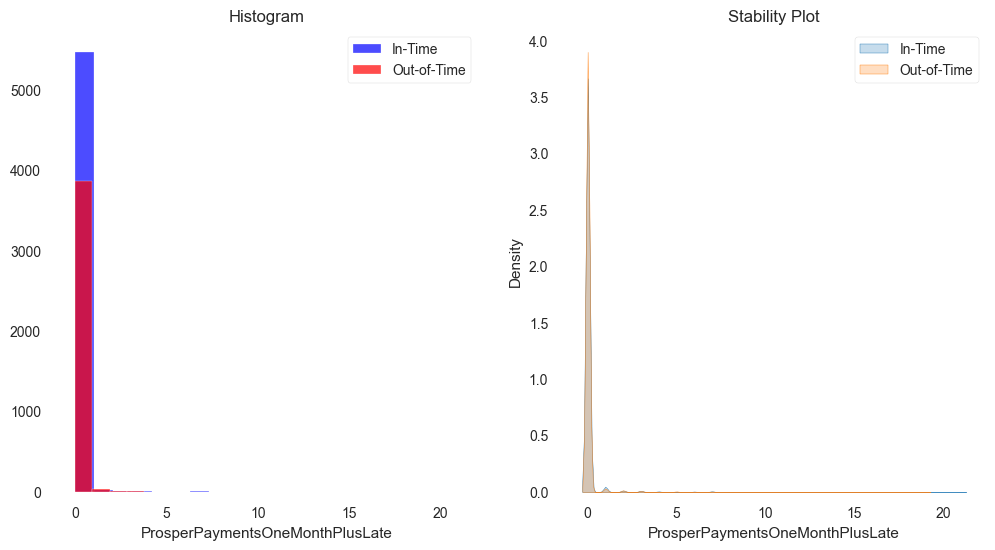

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


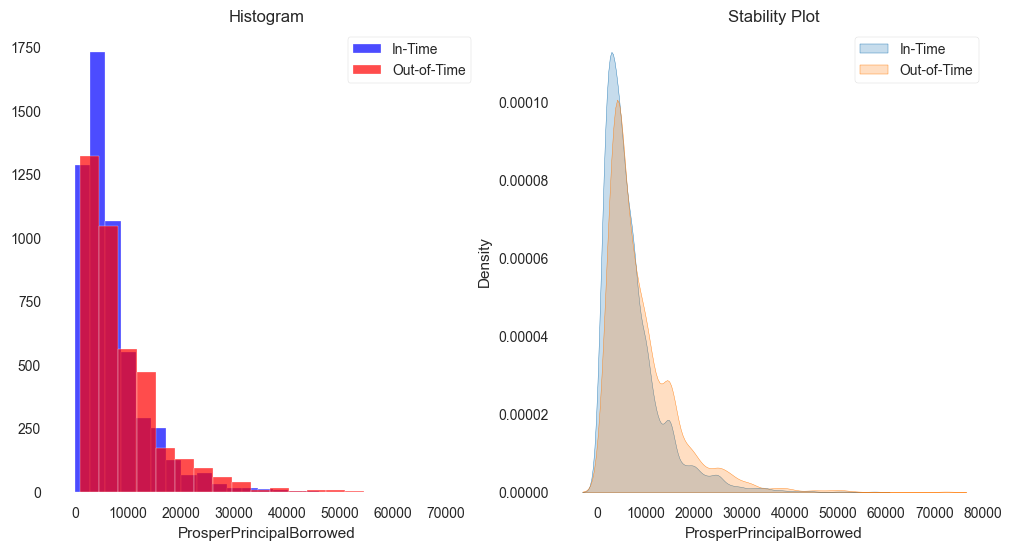

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


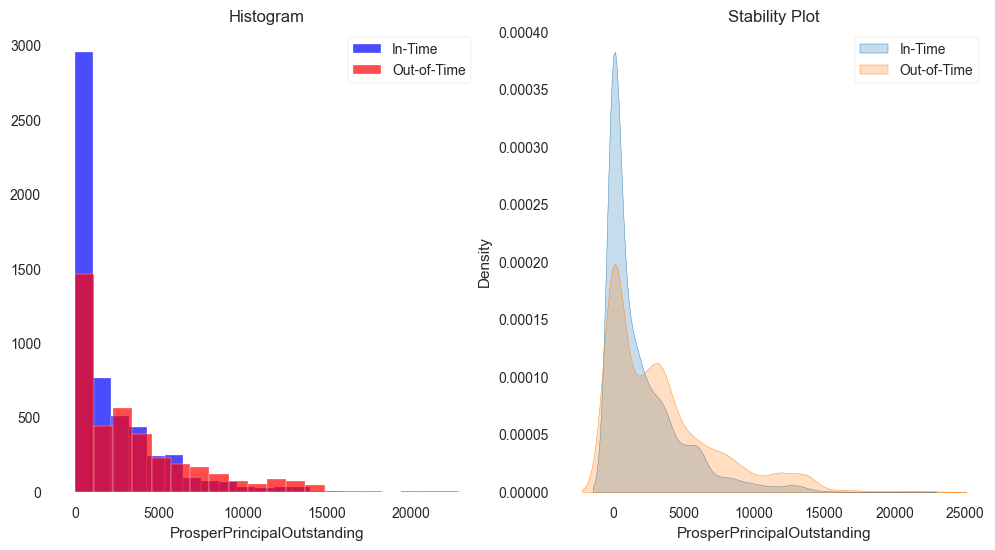

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


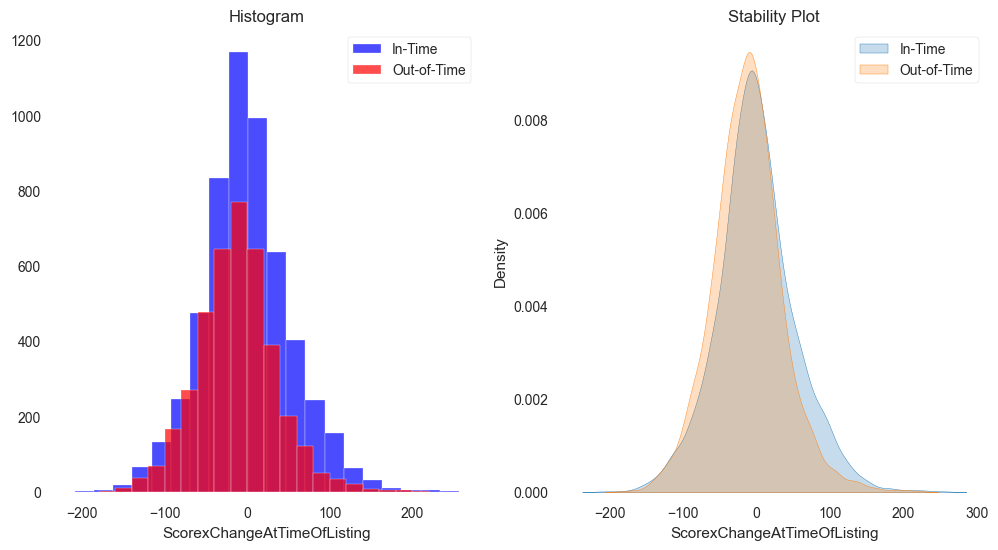

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


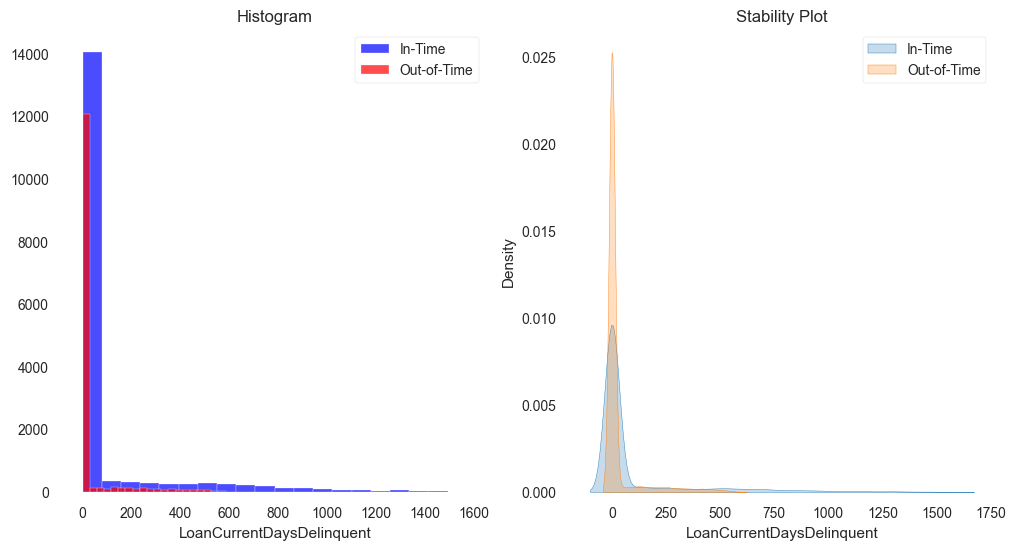

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


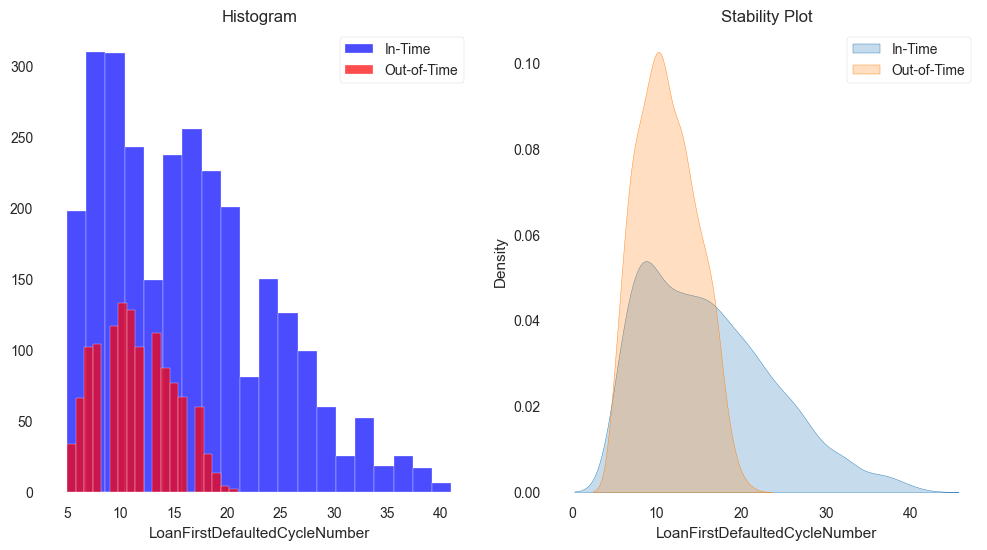

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


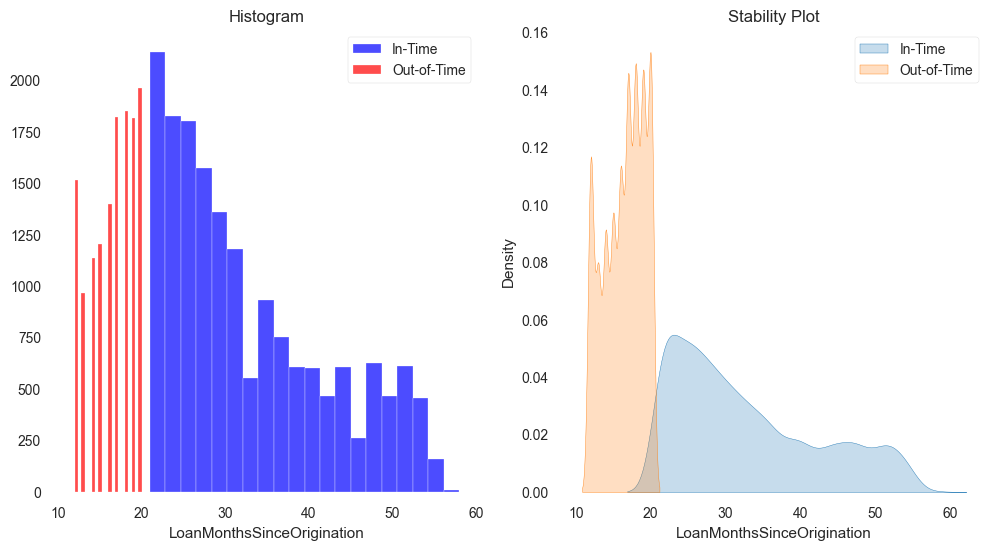

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


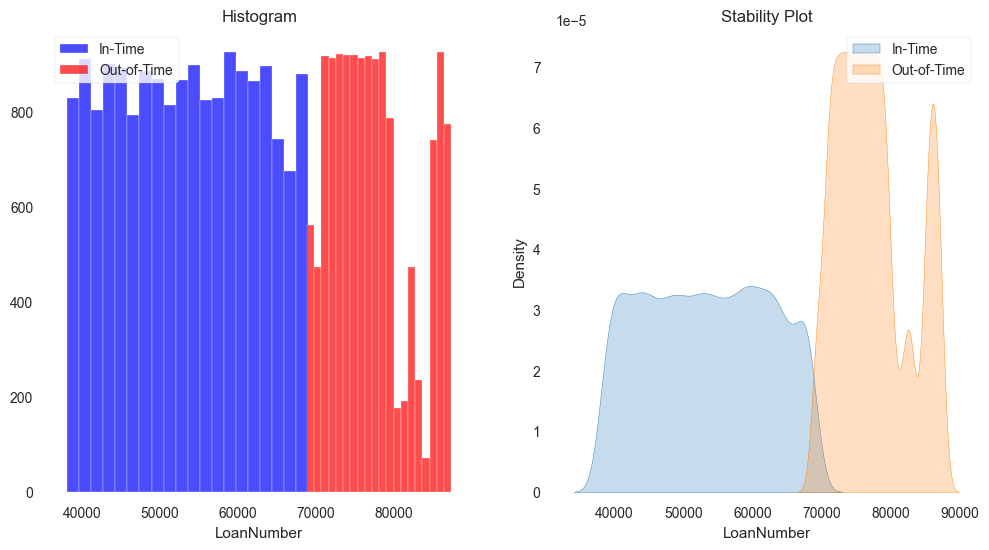

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


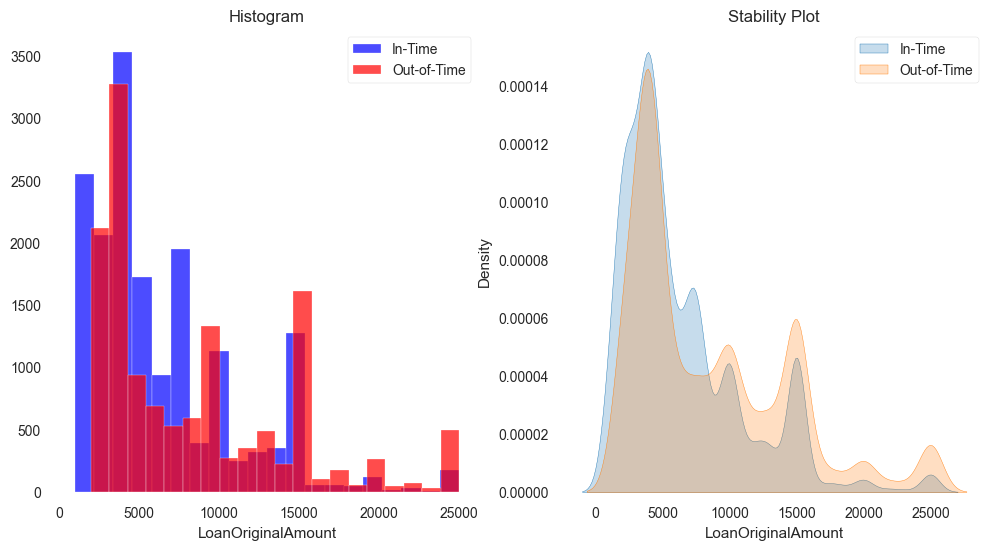

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


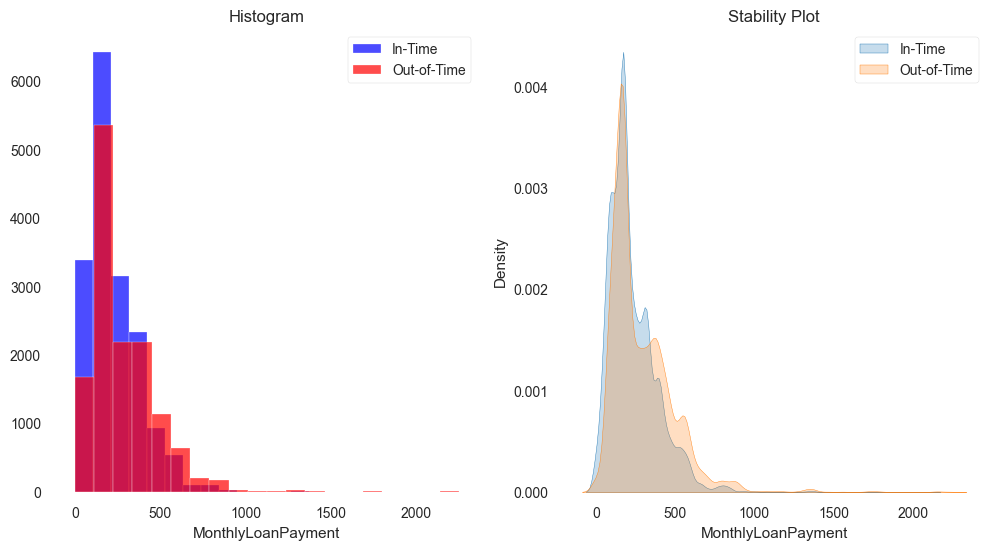

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


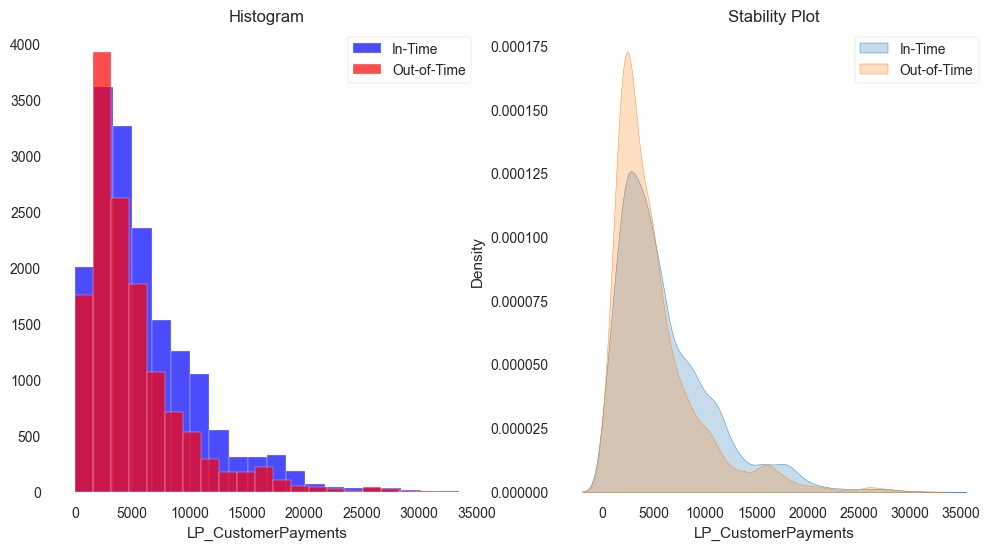

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


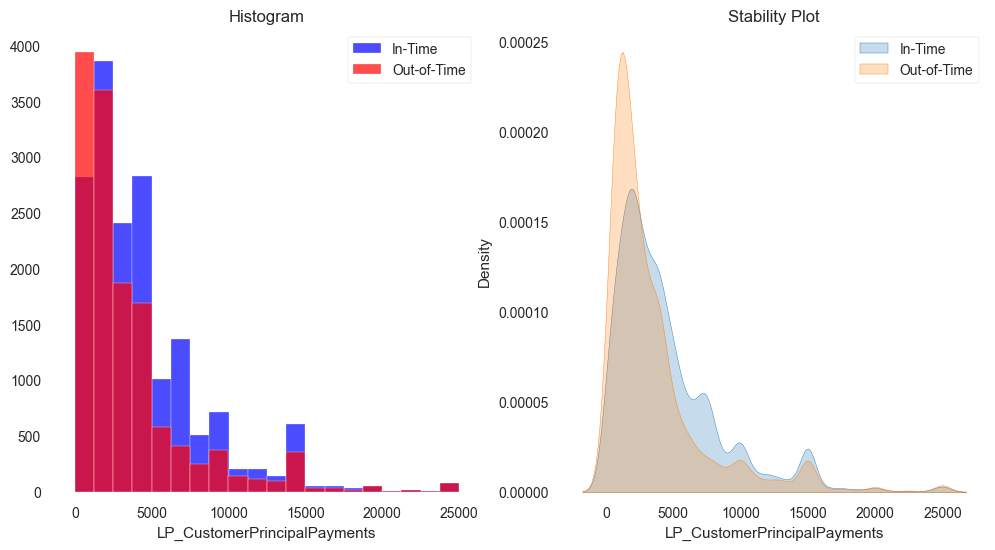

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


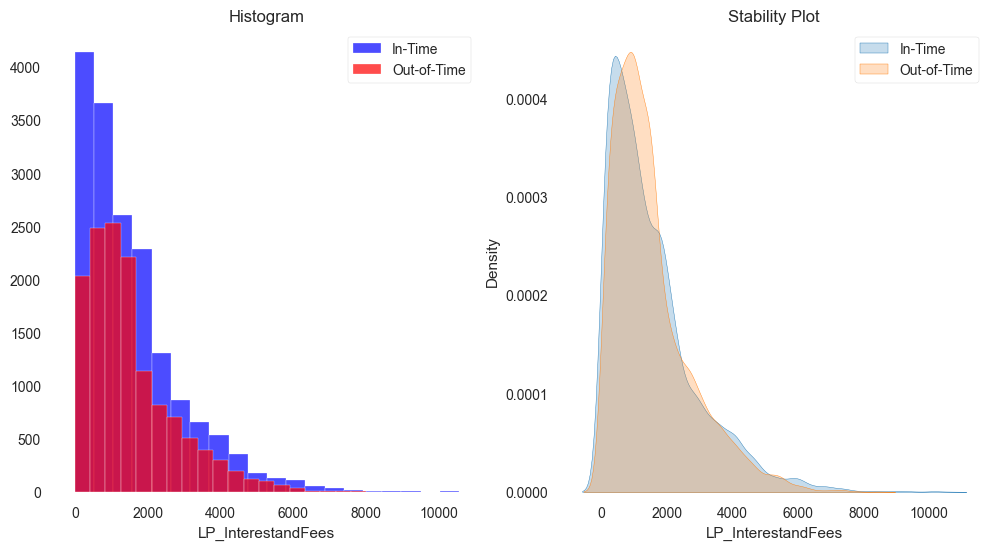

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


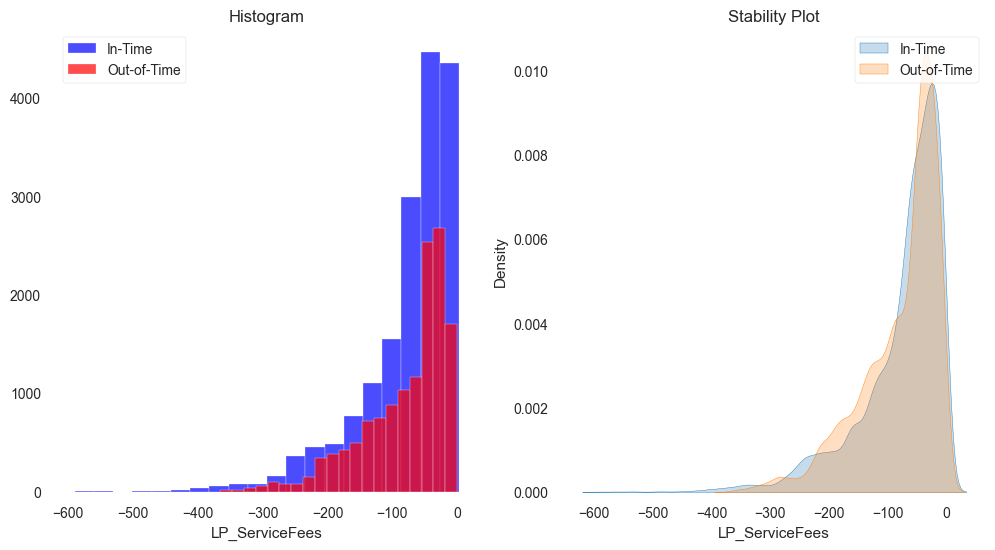

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


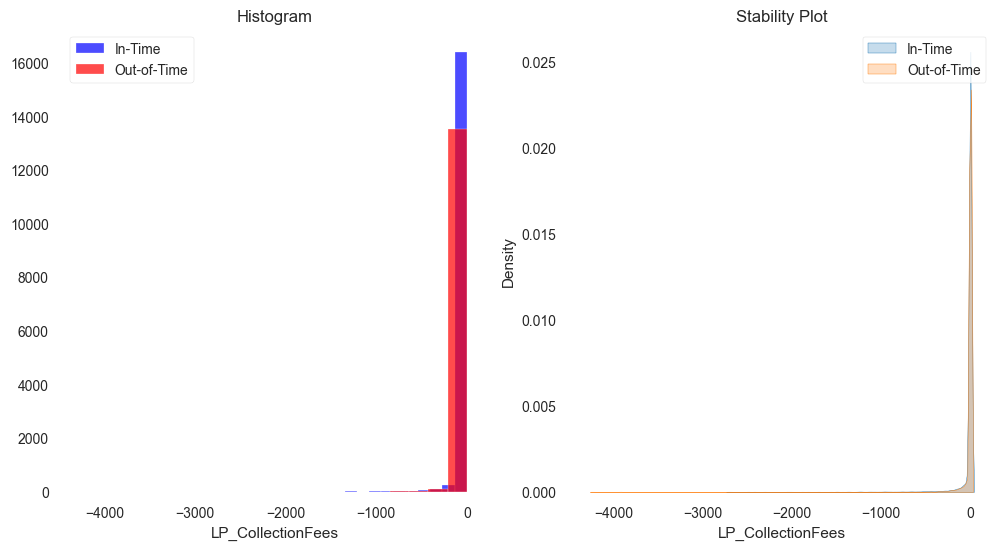

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


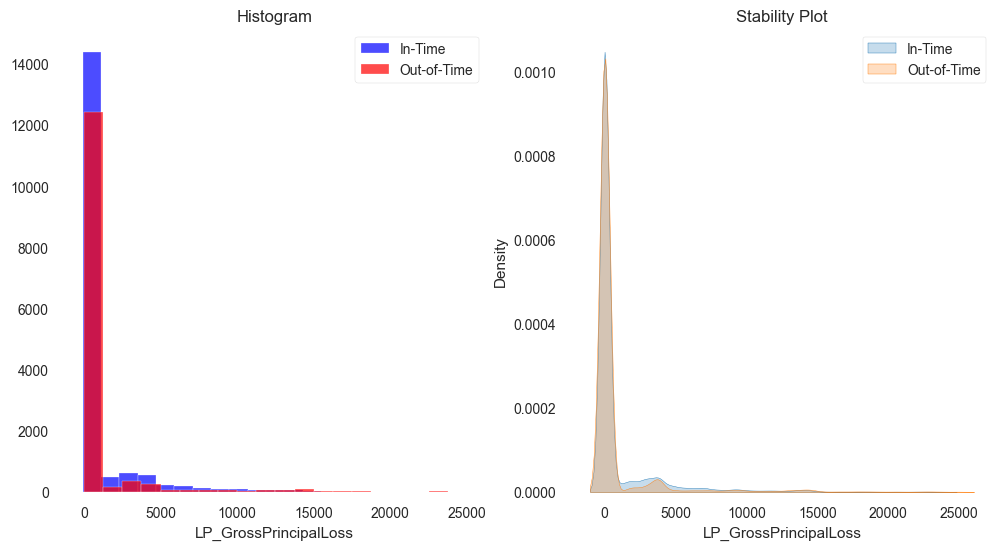

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


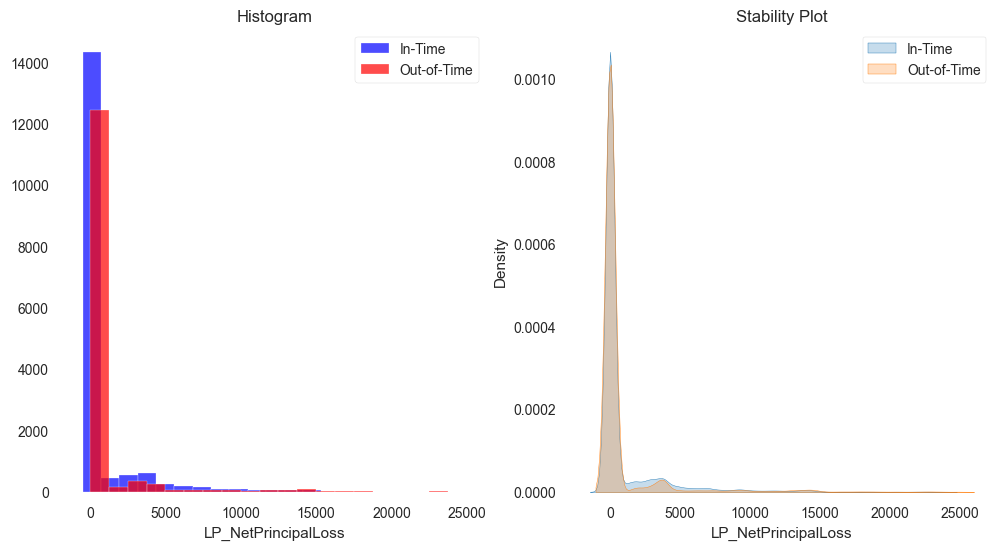

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


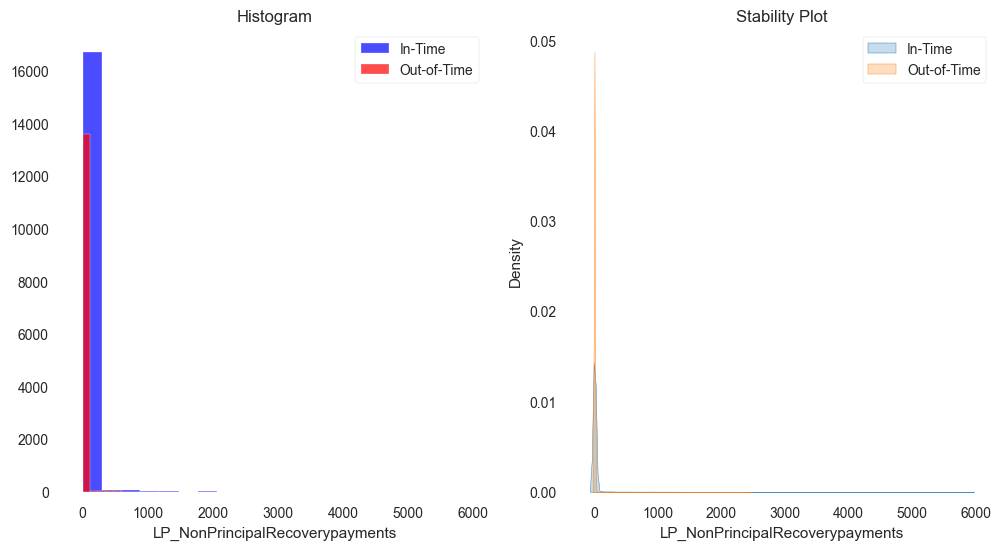

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


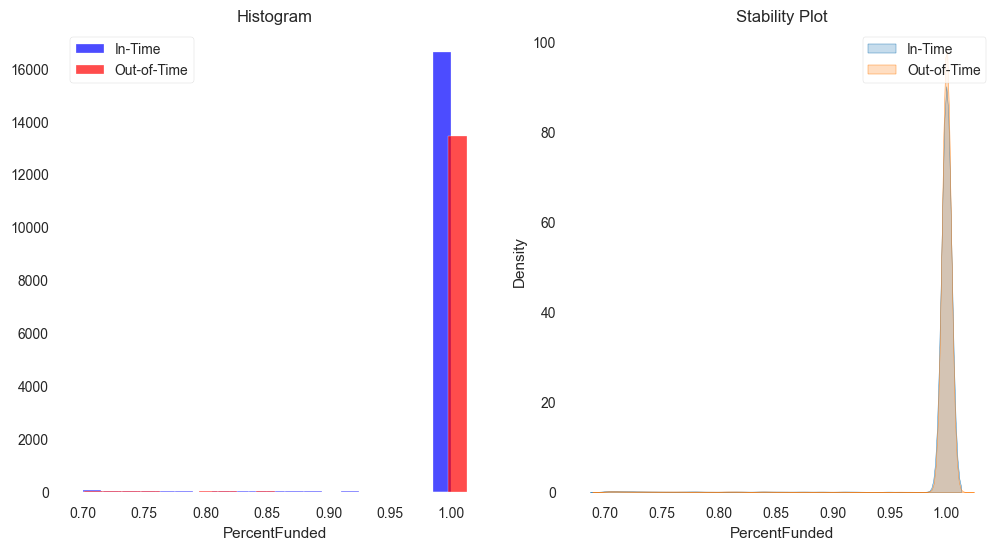

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


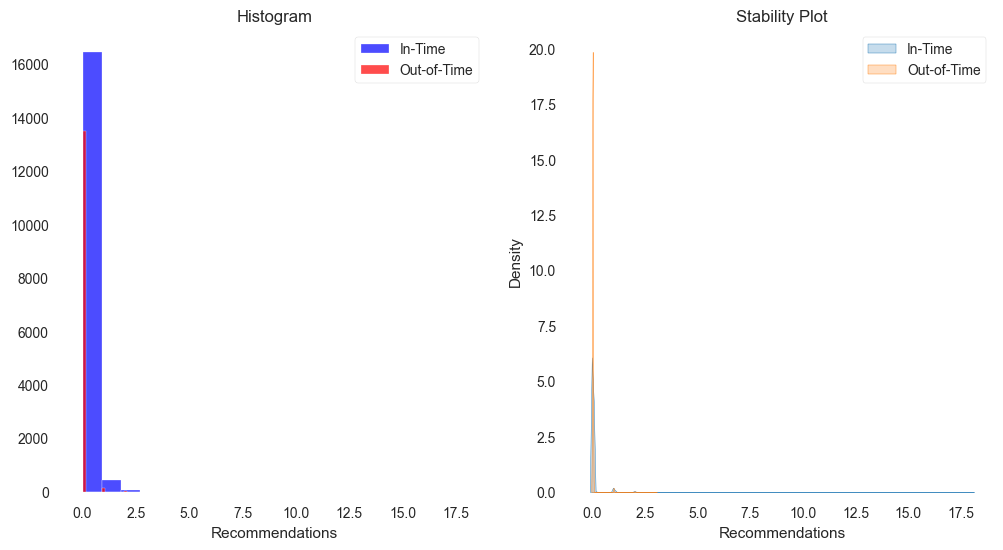

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


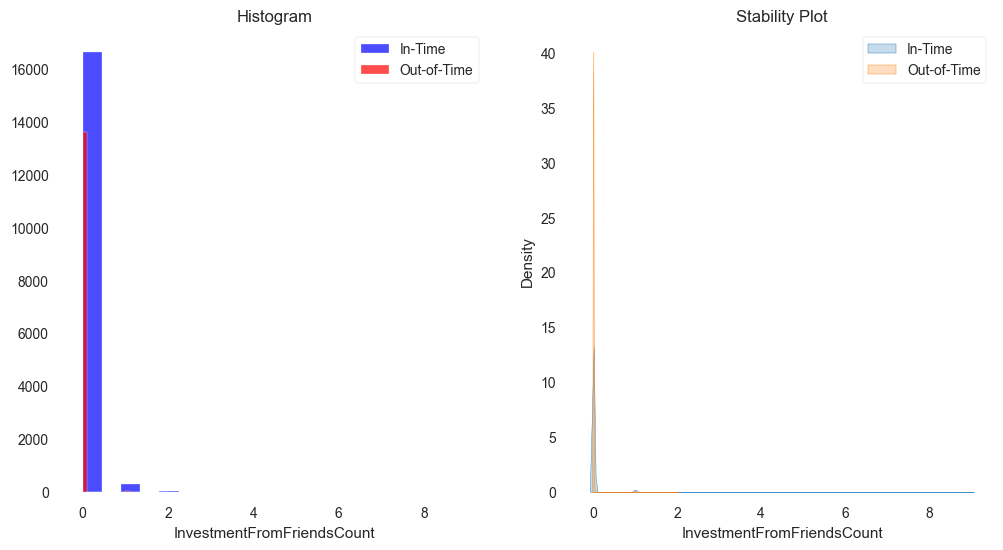

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


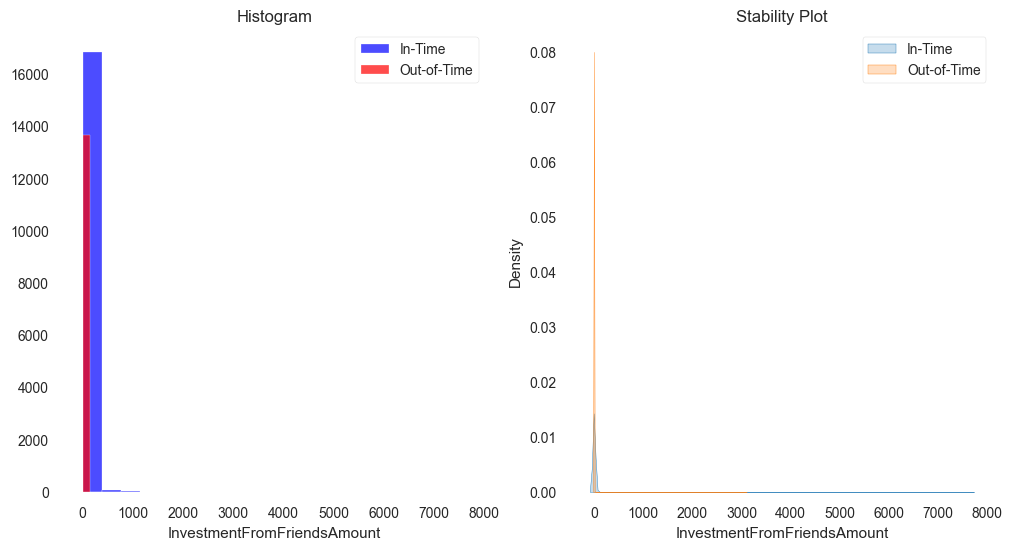

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


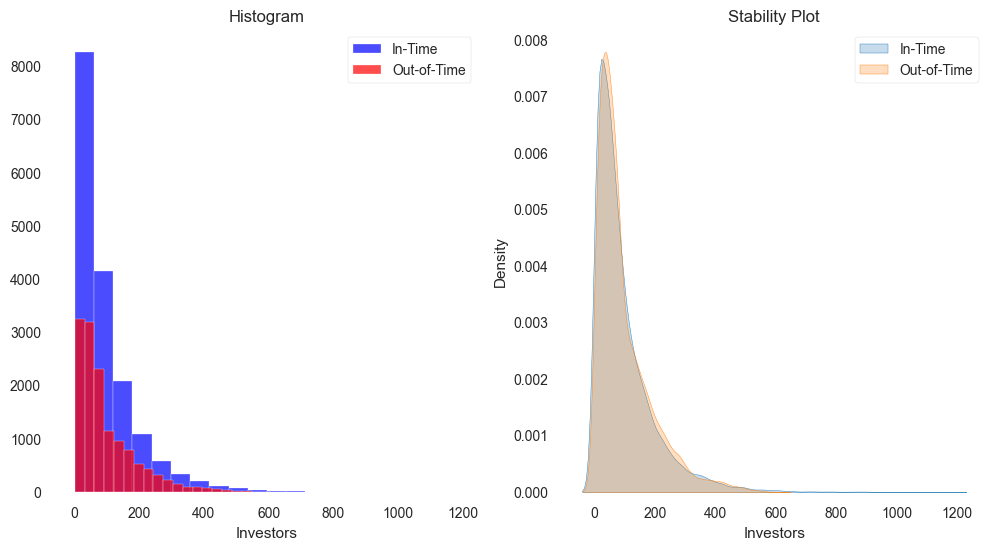

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


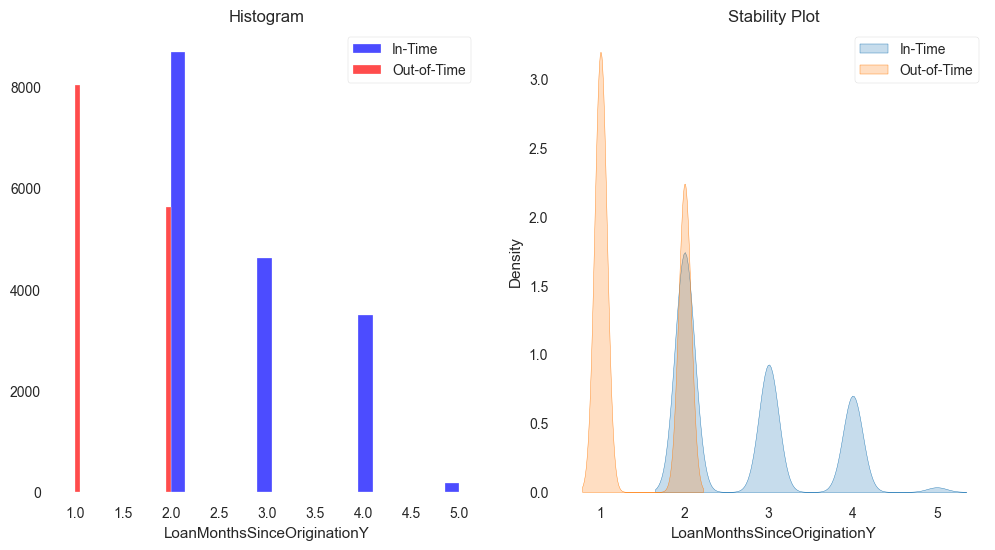

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


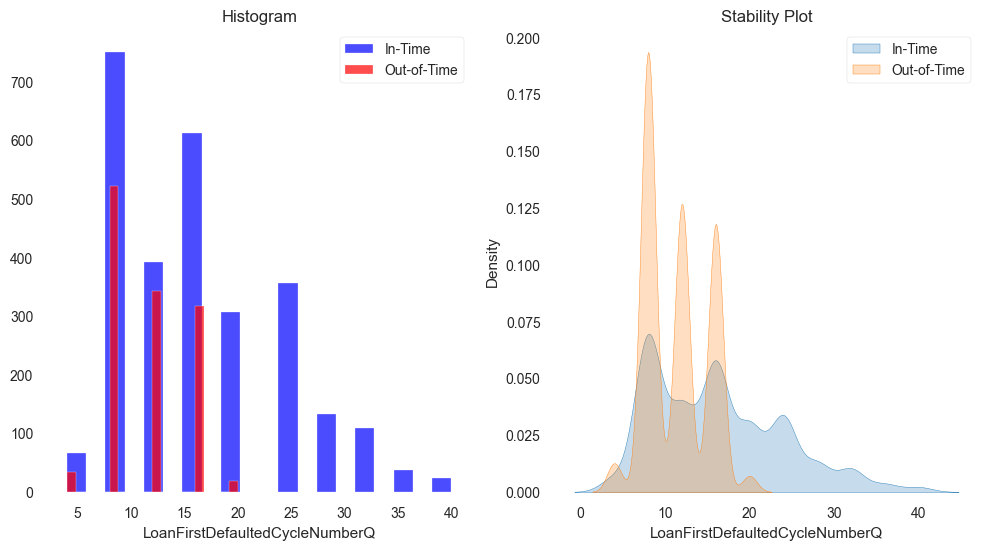

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label='In-Time', shade=True, ax=axs[1])
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/3862694452.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_oot[col], label='Out-of-Time', shade=True, ax=axs[1])


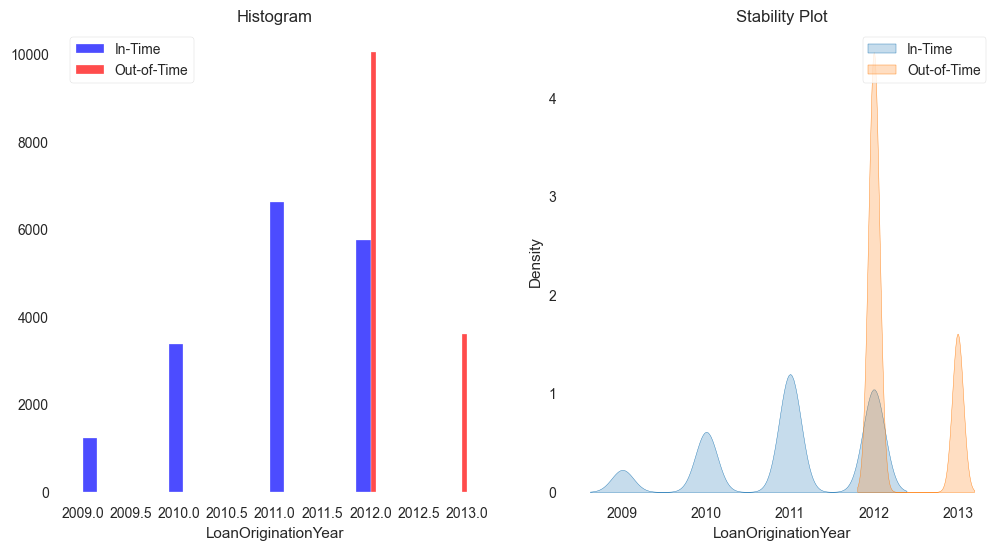

Results for ListingNumber:
Mean: 519379.14087243186
Median: 525109.0
Minimum: 149172
Maximum: 605416
25th Percentile (p25): 484256.5
75th Percentile (p75): 558445.5
Standard Deviation (std): 51186.24968600727
Percentage of Missing Values (%na): 0.0
Percentage of Non-Zero Values (%nonzero): 100.0
Percentage of Unique Values (%unique): 100.0

Results for Term:
Mean: 38.54735974568788
Median: 36.0
Minimum: 12
Maximum: 60
25th Percentile (p25): 36.0
75th Percentile (p75): 36.0
Standard Deviation (std): 9.553738054493802
Percentage of Missing Values (%na): 0.0
Percentage of Non-Zero Values (%nonzero): 100.0
Percentage of Unique Values (%unique): 0.01766056396067581

Results for BorrowerAPR:
Mean: 0.25143852887502205
Median: 0.27246
Minimum: 0.04583
Maximum: 0.41355
25th Percentile (p25): 0.17359
75th Percentile (p75): 0.34105
Standard Deviation (std): 0.0910043506101423
Percentage of Missing Values (%na): 0.0
Percentage of Non-Zero Values (%nonzero): 100.0
Percentage of Unique Values (%uniq

In [41]:
#### EJECUTA AQUÍ LA FUNCIÓN desc_num para todas la variables numéricas
results = desc_num(df, df_oot)

# Muestra los resultados
for col, stats in results.items():
    print(f"Results for {col}:")
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print()

**TODO 2** Crea una función que cumpla con la funcionalidad descrita en la cabecera de la función desc_cat

In [42]:
from collections import Counter

def desc_cat(df, df_oot, col):
    stats = {}
    
    unique_entries = df[col].nunique()
    
    percentage_unique = (unique_entries / len(df)) * 100
    
    top_entry = df[col].mode().iloc[0]
    
    top_entry_frequency = (df[col] == top_entry).sum() / len(df) * 100
    
    na_rate = df[col].isna().mean() * 100
    
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    stats['Unique Entries'] = unique_entries
    stats['% Unique Entries'] = percentage_unique
    stats['Top Frequent Entry'] = top_entry
    stats['Frequency of Top Entry'] = top_entry_frequency
    stats['NA Rate'] = na_rate
    
    return stats

Results for ListingCreationDate


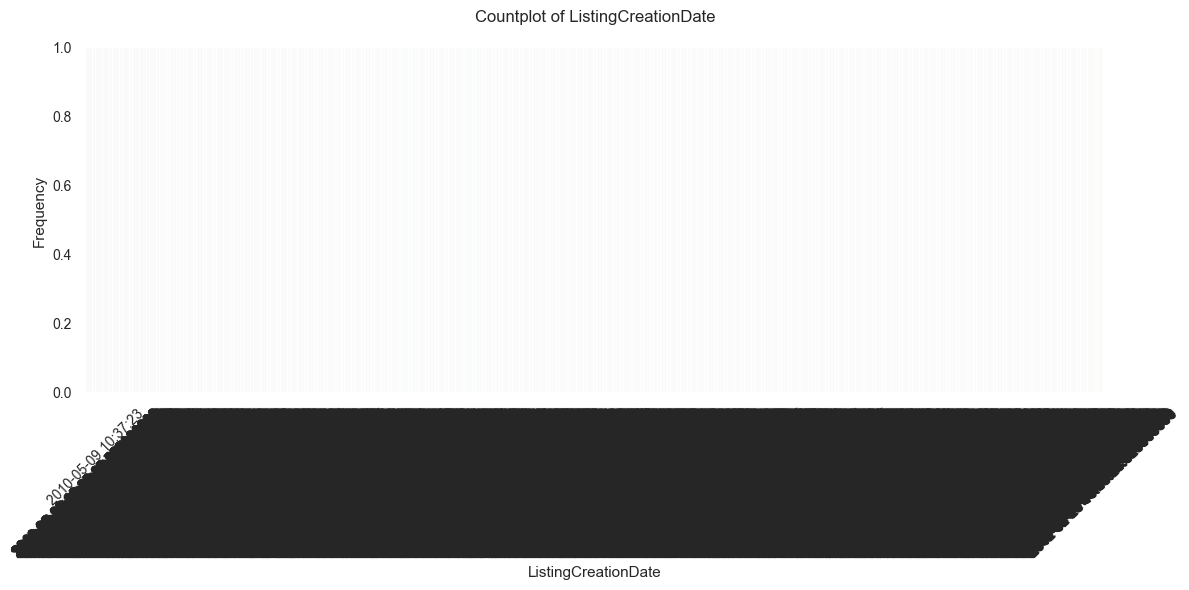

{'Unique Entries': 16987, '% Unique Entries': 100.0, 'Top Frequent Entry': '2007-06-08 15:33:26.040000000', 'Frequency of Top Entry': 0.0058868546535586035, 'NA Rate': 0.0}
Results for ClosedDate


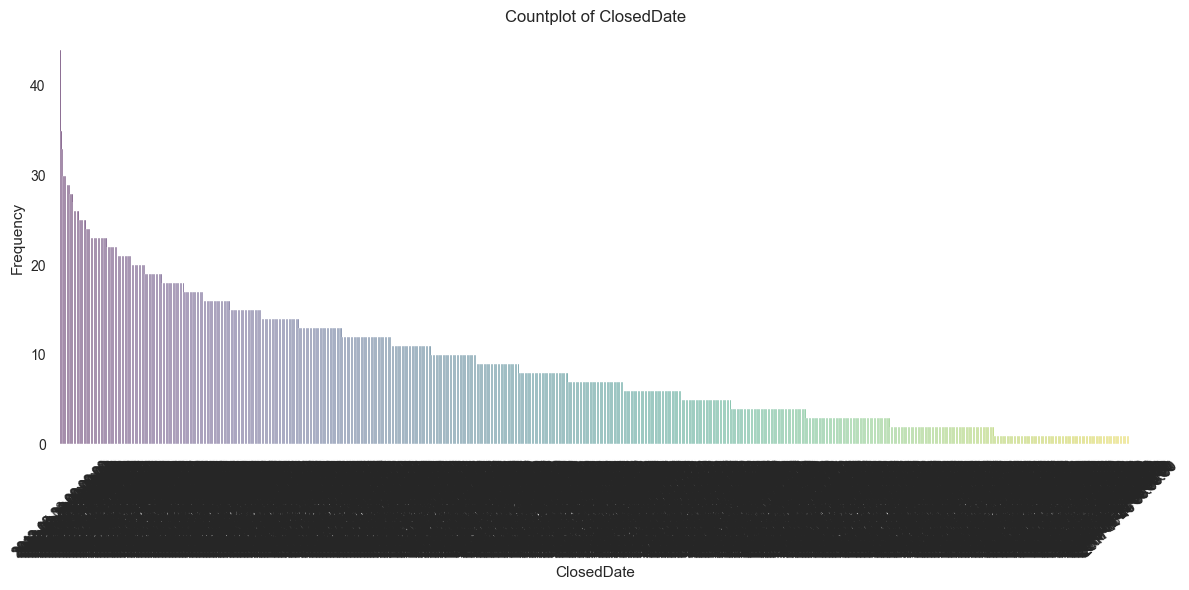

{'Unique Entries': 1383, '% Unique Entries': 8.14151998587155, 'Top Frequent Entry': '2012-10-30 00:00:00', 'Frequency of Top Entry': 0.2590216047565786, 'NA Rate': 30.158356390180725}
Results for ProsperRating (Alpha)


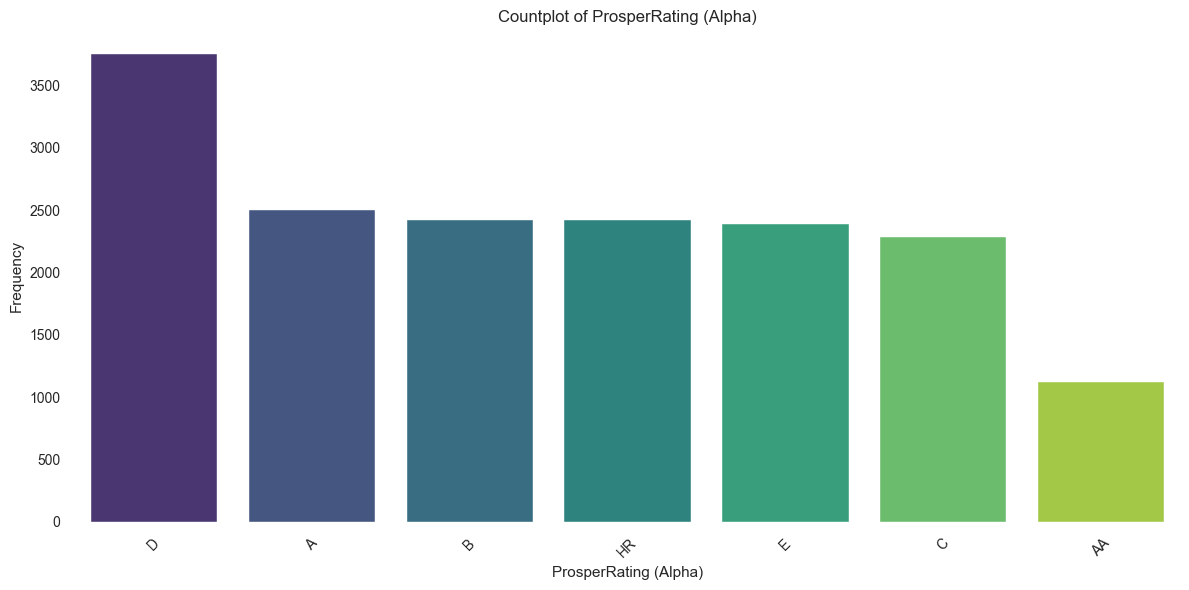

{'Unique Entries': 7, '% Unique Entries': 0.04120798257491023, 'Top Frequent Entry': 'D', 'Frequency of Top Entry': 22.10513922411256, 'NA Rate': 0.5298169188202744}
Results for BorrowerState


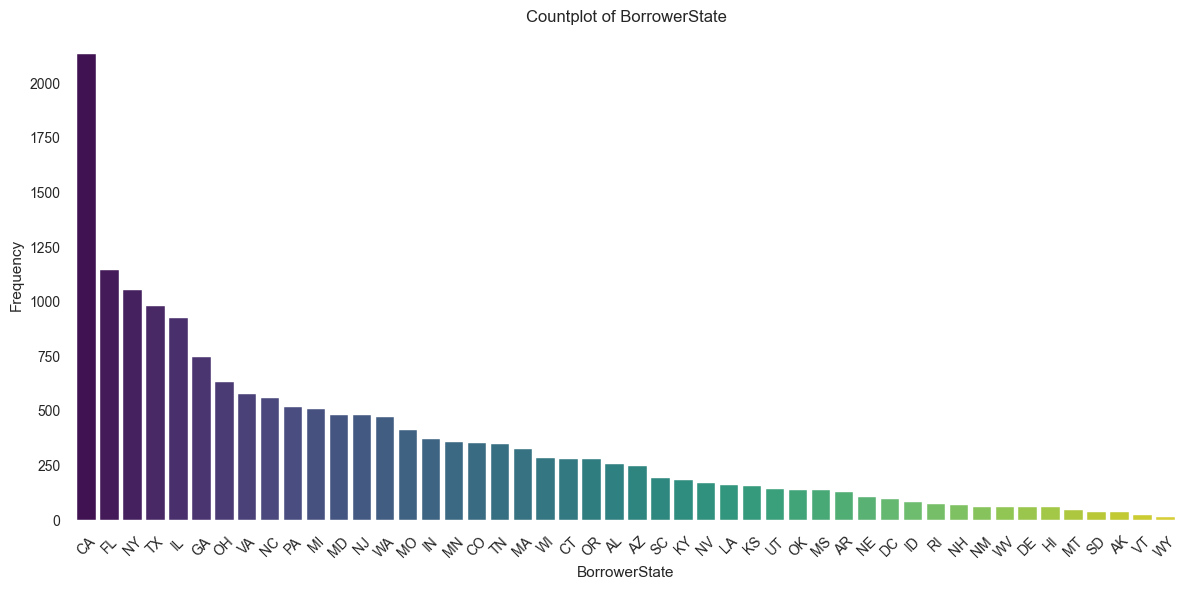

{'Unique Entries': 48, '% Unique Entries': 0.28256902337081297, 'Top Frequent Entry': 'CA', 'Frequency of Top Entry': 12.568434685347619, 'NA Rate': 0.0}
Results for Occupation


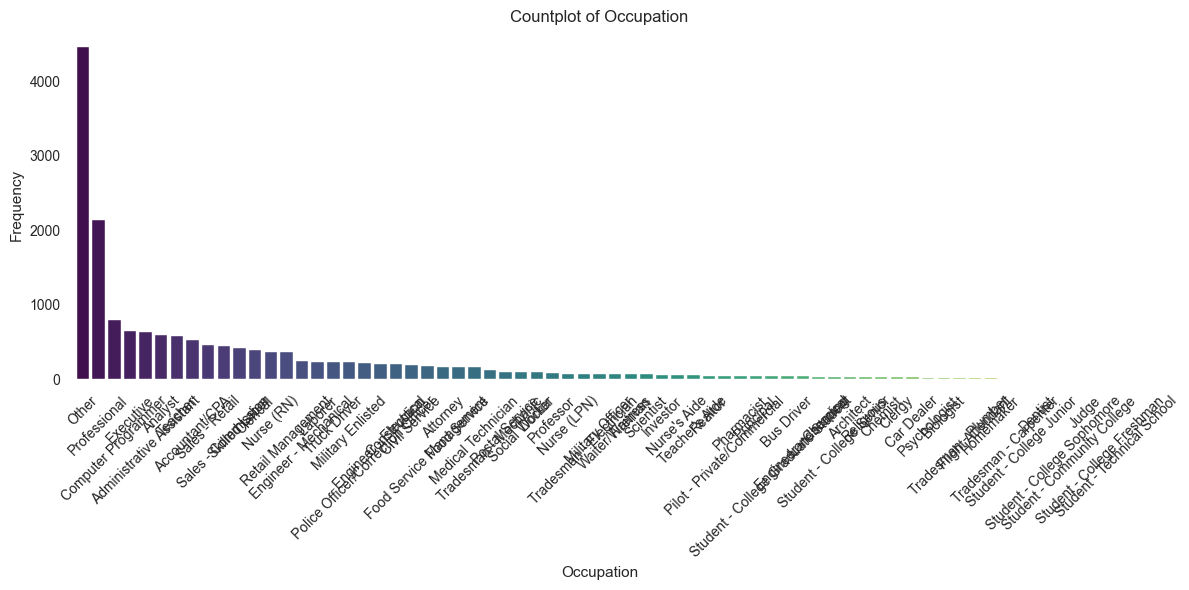

{'Unique Entries': 67, '% Unique Entries': 0.39441926178842646, 'Top Frequent Entry': 'Other', 'Frequency of Top Entry': 26.25537175487137, 'NA Rate': 0.0}
Results for EmploymentStatus


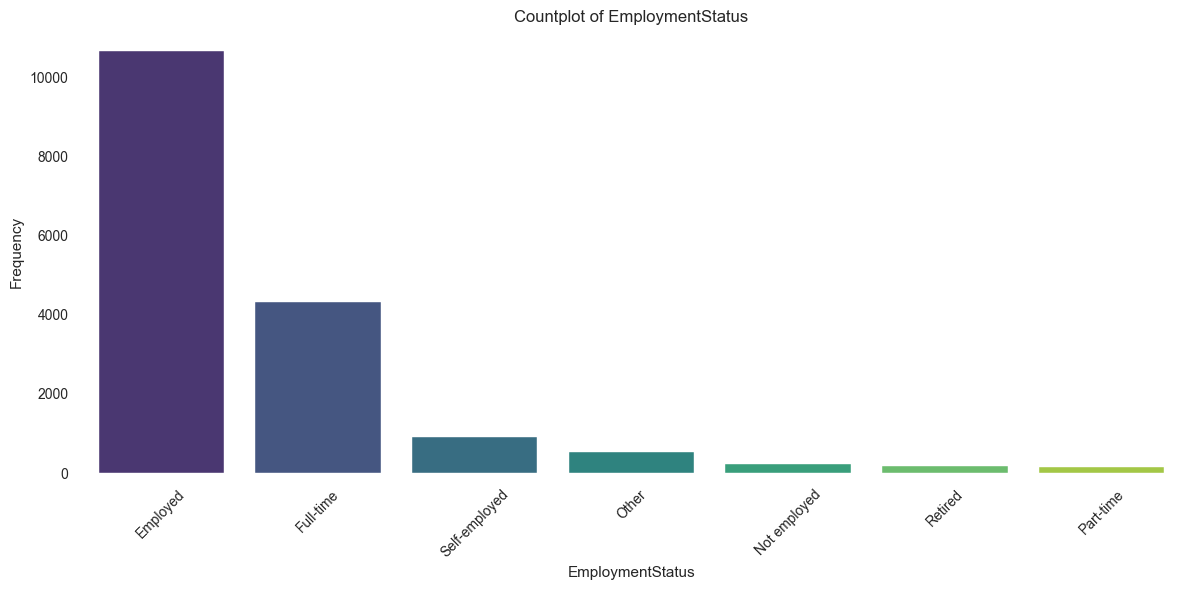

{'Unique Entries': 7, '% Unique Entries': 0.04120798257491023, 'Top Frequent Entry': 'Employed', 'Frequency of Top Entry': 62.67734149643845, 'NA Rate': 0.0}
Results for DateCreditPulled


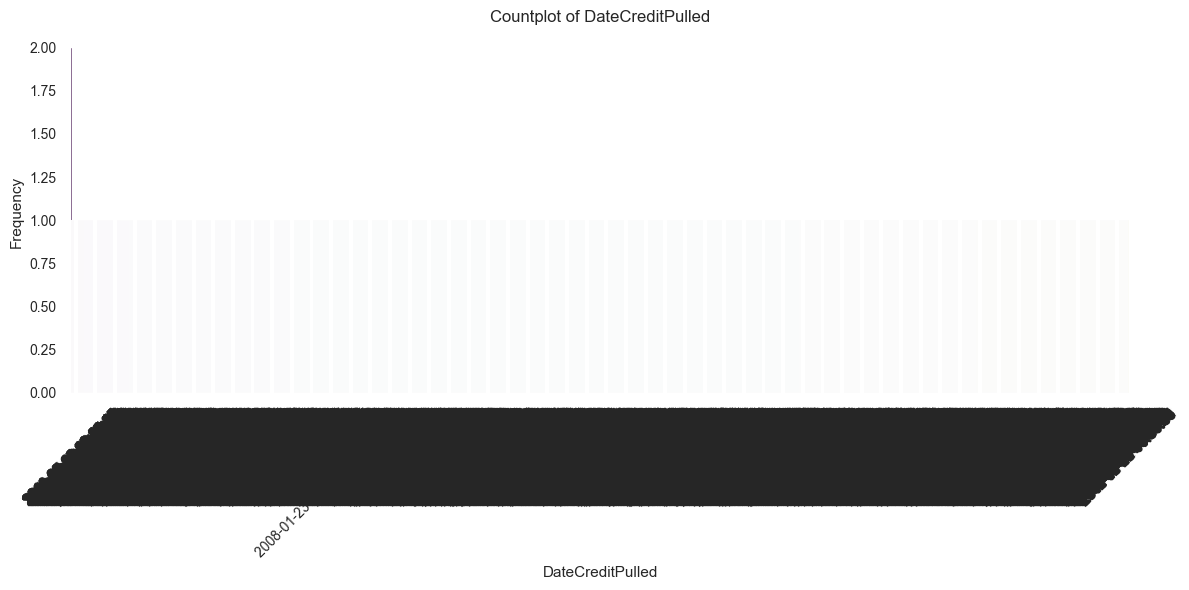

{'Unique Entries': 16983, '% Unique Entries': 99.97645258138577, 'Top Frequent Entry': '2010-07-29 14:29:08', 'Frequency of Top Entry': 0.011773709307117207, 'NA Rate': 0.0}
Results for FirstRecordedCreditLine


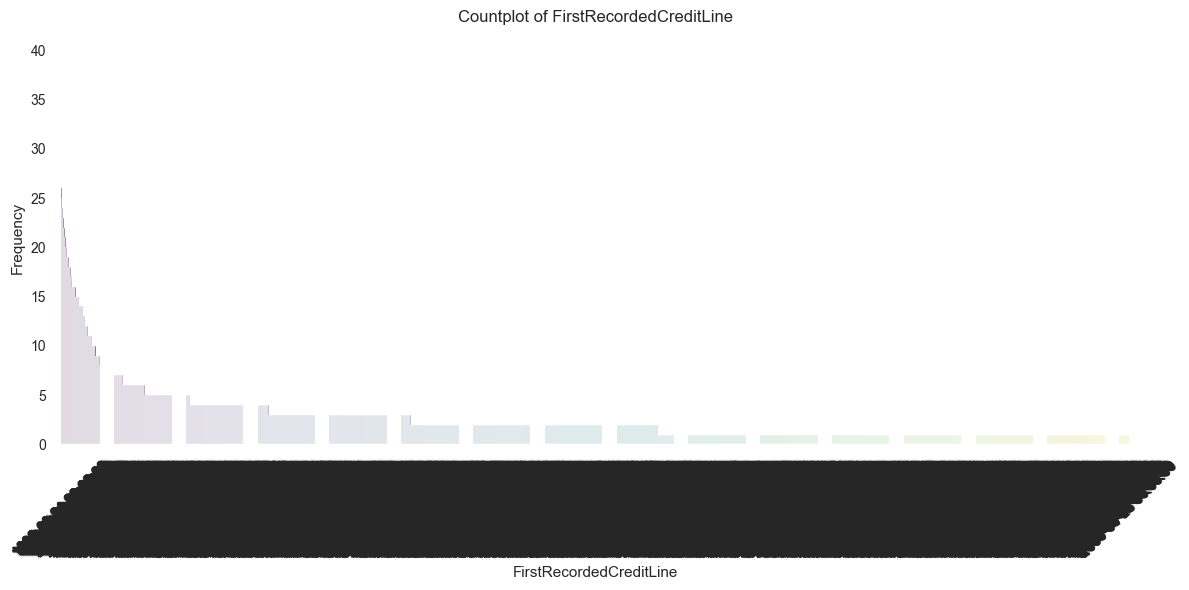

{'Unique Entries': 6428, '% Unique Entries': 37.8407017130747, 'Top Frequent Entry': '1993-12-01 00:00:00', 'Frequency of Top Entry': 0.23547418614234414, 'NA Rate': 0.0}
Results for IncomeRange


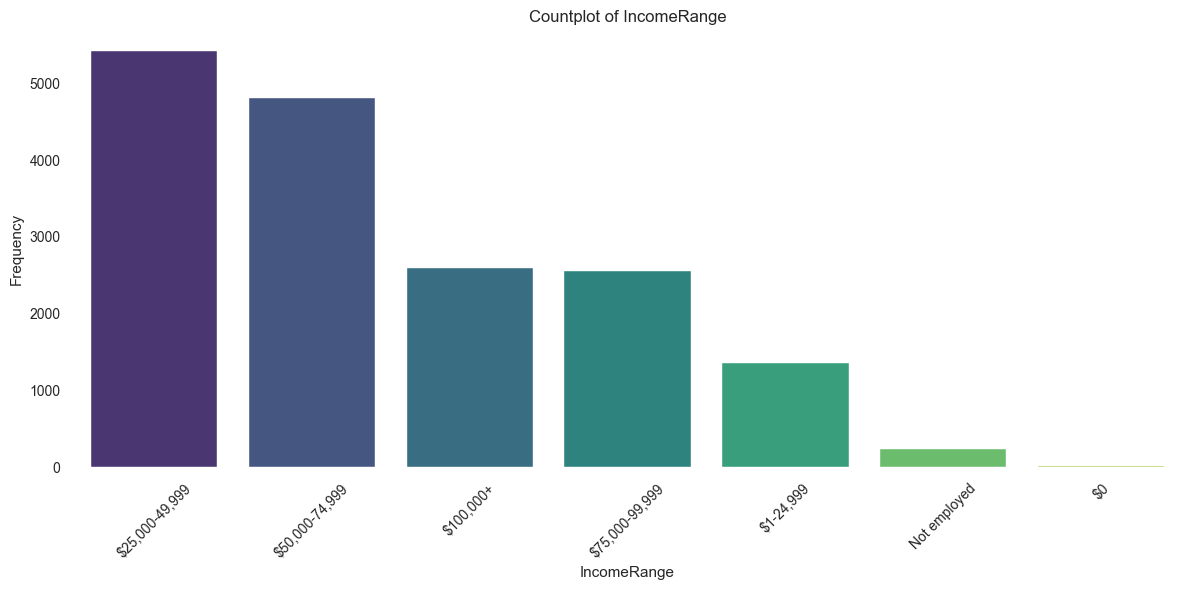

{'Unique Entries': 7, '% Unique Entries': 0.04120798257491023, 'Top Frequent Entry': '$25,000-49,999', 'Frequency of Top Entry': 31.906752222287633, 'NA Rate': 0.0}
Results for LoanOriginationDate


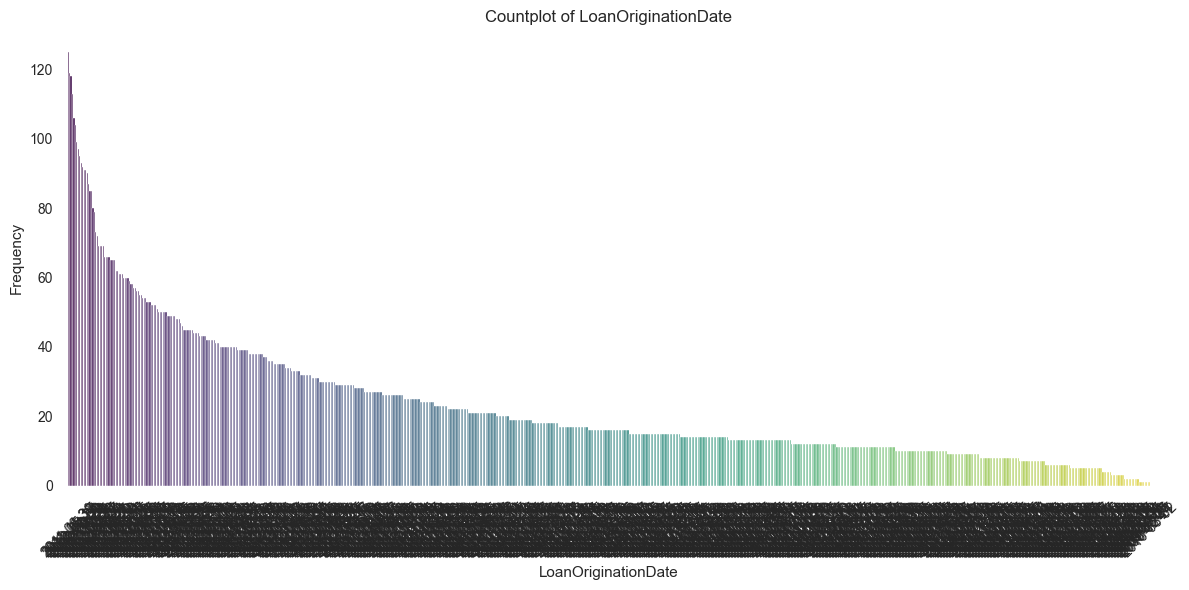

{'Unique Entries': 741, '% Unique Entries': 4.362159298286925, 'Top Frequent Entry': '2011-08-31', 'Frequency of Top Entry': 0.7358568316948254, 'NA Rate': 0.0}
Results for LoanOriginationQuarter


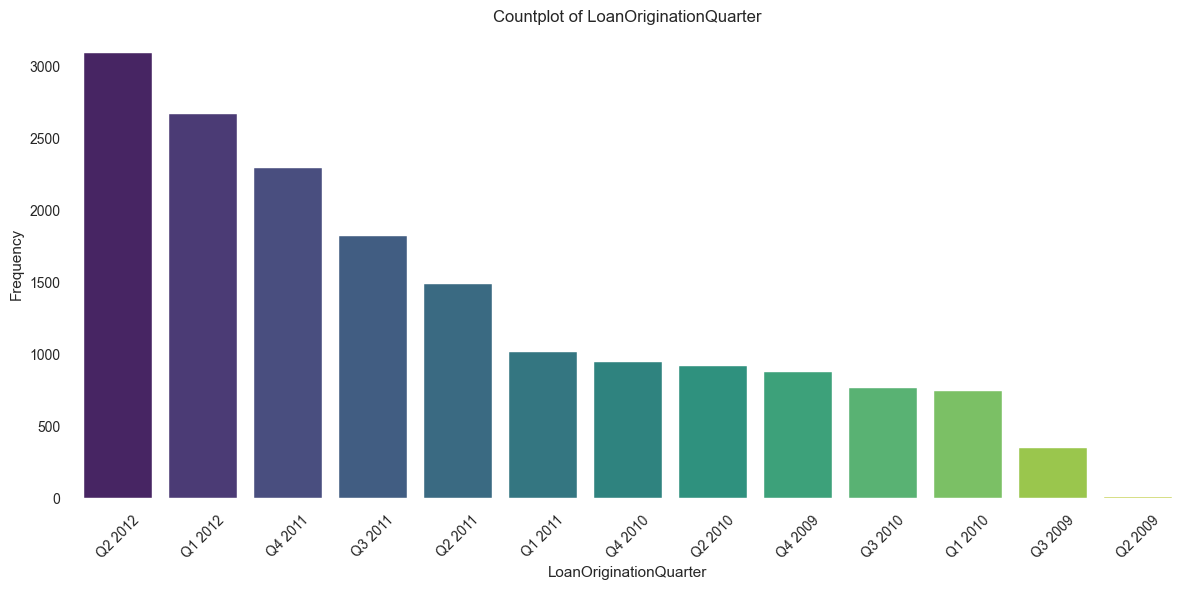

{'Unique Entries': 13, '% Unique Entries': 0.07652911049626185, 'Top Frequent Entry': 'Q2 2012', 'Frequency of Top Entry': 18.213928298110318, 'NA Rate': 0.0}


In [43]:
#### EJECUTA AQUÍ LA FUNCIÓN desc_cat para todas las variable categóricas
for feat in cat_features:
    print(f"Results for {feat}")
    result = desc_cat(df, df_oot, feat)
    print(result)


### Correlation Review

<Axes: >

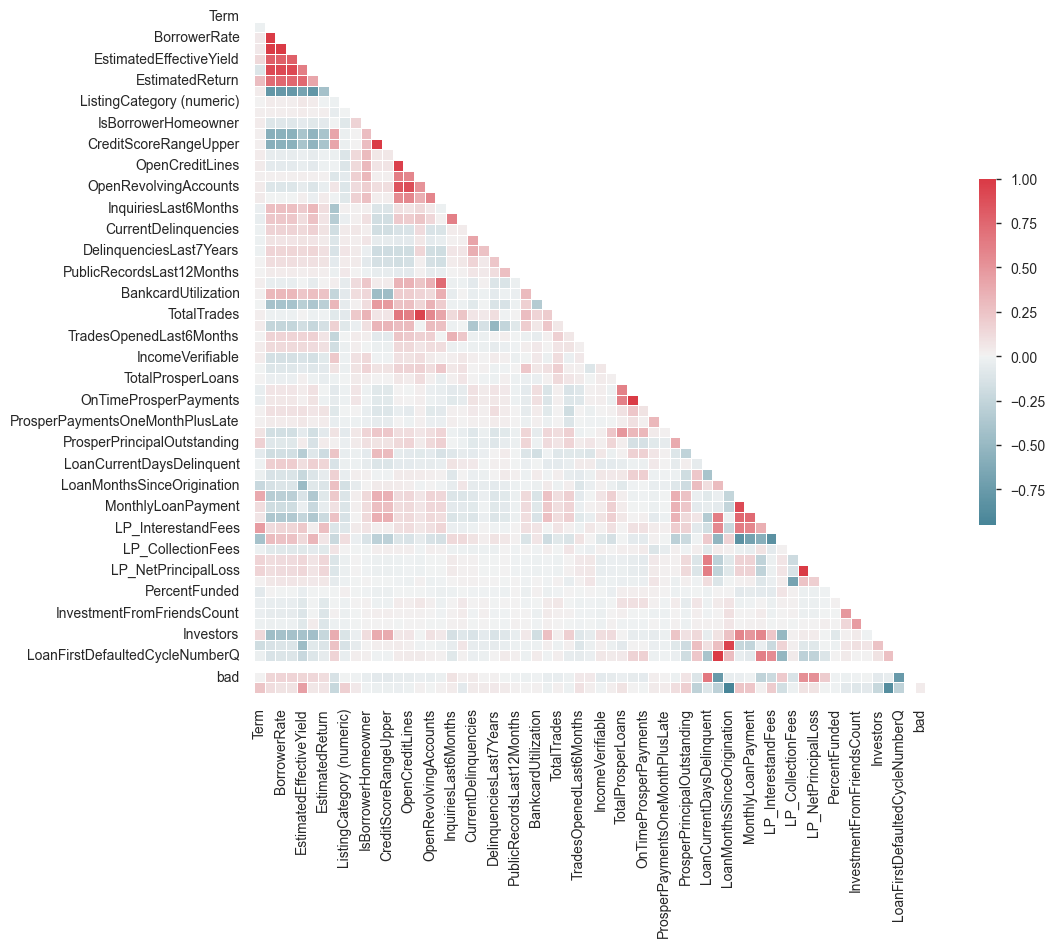

In [44]:
corr = df[num_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
corr[corr!=1].max().sort_values().tail(5)

LP_GrossPrincipalLoss    0.991177
BorrowerAPR              0.991769
BorrowerRate             0.999991
LenderYield              0.999991
fraud                         NaN
dtype: float64

#### Get pairs of highly correlated features

In [46]:
corr_TH = 0.75
n_corr_list = []
corr_feats_list = []

In [47]:
for f in num_features:
    corr_f = corr[f][[col for col in num_features if col!=f]]
    corr_f_abs = corr_f.abs()
    corr_ht_th = corr_f_abs[corr_f_abs>corr_TH]
    n_corr_list.append(corr_ht_th.shape[0])
    corr_feats_list.append(corr_ht_th)
    
corr_relations = [(feat, n, feats_corr) for n, feats_corr, feat in zip(n_corr_list, corr_feats_list, num_features) if n>0]
corr_relations

[('BorrowerAPR',
  5,
  BorrowerRate               0.991768
  LenderYield                0.991769
  EstimatedEffectiveYield    0.794456
  EstimatedLoss              0.914831
  ProsperScore               0.783380
  Name: BorrowerAPR, dtype: float64),
 ('BorrowerRate',
  6,
  BorrowerAPR                0.991768
  LenderYield                0.999991
  EstimatedEffectiveYield    0.788876
  EstimatedLoss              0.909478
  EstimatedReturn            0.751935
  ProsperScore               0.769944
  Name: BorrowerRate, dtype: float64),
 ('LenderYield',
  6,
  BorrowerAPR                0.991769
  BorrowerRate               0.999991
  EstimatedEffectiveYield    0.788947
  EstimatedLoss              0.909505
  EstimatedReturn            0.751915
  ProsperScore               0.769988
  Name: LenderYield, dtype: float64),
 ('EstimatedEffectiveYield',
  3,
  BorrowerAPR     0.794456
  BorrowerRate    0.788876
  LenderYield     0.788947
  Name: EstimatedEffectiveYield, dtype: float64),
 ('Esti

### Recommended tool: pandas-profiling

In [26]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df[features])
profile.to_file(output_file='output.html')

/Users/javiersendraestruch/anaconda3/envs/Credit_Risk/lib/python3.10/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Summarize dataset:   2%|▏         | 78/3218 [00:05<03:41, 14.20it/s, scatter BorrowerAPR, BorrowerAPR]                   


AttributeError: module 'matplotlib.cbook' has no attribute 'mplDeprecation'

In [ ]:
display(profile)

## IV / WoE


Una vez identificadas las variables más importantes, el siguiente paso que tenemos que hacer es establecer los trameados (buckets), con la misma acción para las variables categóricas y numéricas

In [48]:
#visualization functions
def capture_df(feat_col, input_slider, n_bins, df, target_col):
    """
    Handles the type of the data to generate the intermediate datadframe
    """
    if df[feat_col].dtype in [int, float, np.number]:
        return df_vol_br_num(feat_col, input_slider, n_bins, df, target_col)
    else:
        return df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col)

#capture volume / BR df for numerical variables
def df_vol_br_num(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the intermediate dataframe with number of observations and 
    number of bads per bin. Specific for numerical features.
    """
    #get the numeric input from the dual slider
    perc_sliders = [v/100. for v in input_slider]
    var_lims = df[feat_col].quantile([perc_sliders[0], perc_sliders[1]]).values
    v_min, v_max = var_lims[0], var_lims[1]
    #filter the dataset using the slider input
    df_cut = df.loc[(df[feat_col] <= v_max) & (df[feat_col] >= v_min)][[obj_col, feat_col]]
    #number of cuts = minumum of n_bins, number of unique values of the variable
    n_cuts = min(int(n_bins), df_cut[feat_col].nunique())
    cuts = [c for c in np.linspace(v_min, v_max, n_cuts + 1)]
    if cuts[-1] < v_max:
        cuts.append(v_max)
    cut_col = feat_col + '_'
    df_cut[cut_col] = pd.cut(df_cut[feat_col], cuts, include_lowest=True)
    #generate aggregated values
    N = df_cut.groupby(cut_col)[feat_col].count().values
    TR = df_cut.groupby(cut_col)[obj_col].mean().values
    cuts = df_cut.groupby(cut_col)[feat_col].count().index.astype(str).values
    #handle NA entries
    if df[feat_col].isna().sum() > 0:
        N = np.append(([df[feat_col].isna().sum()]), N)
        TR = np.append(([df.loc[df[feat_col].isna()][obj_col].mean()]), TR)
        cuts =  np.append(['NA'], cuts)
    #generate global transformation rate
    return (pd.DataFrame({'cuts': cuts,
                         'N': N,
                         'BR': TR}), df_cut[obj_col].mean())

#capture volume / BR df for categorical variables
def df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col):
    """
    Generate the intermediate dataframe with number of observations and 
    number of bads per bin. Specific for categorical features.
    """
    #pick top n_bins levels by volume
    cut_levels = df.groupby(feat_col)[feat_col].count().sort_values(ascending=False)[:int(n_bins)].index.values.tolist()
    df_cut = df.loc[df[feat_col].isin(cut_levels)]
    #capture volumes
    N = df_cut.groupby(feat_col)[feat_col].count().values
    #capture transformations
    TR = df_cut.groupby(feat_col)[target_col].mean().values
    return (pd.DataFrame({'cuts': df_cut.groupby(feat_col)[feat_col].count().index.astype(str).values,
                         'N': N,
                         'BR': TR}), df_cut[target_col].mean())


def output_graph_update(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the plotly plot showing the visualization of the intermediate 
    dataframe with volume and bad rate per bin.
    """
    #get the df with volume and bad rate
    df_tr, avg_tr = capture_df(feat_col, input_slider, n_bins, df, obj_col)
    #line represents transformation rate
    tr_line = go.Scatter(x = df_tr.cuts,
                         y = df_tr.BR,
                         yaxis = 'y2',
                         name = 'BR')
    #bar represents volume @ cut
    vol_bars = go.Bar(x = df_tr.cuts,
                      y = df_tr.N,
                      name = 'Volume')
    #avg line
    avg_line = go.Scatter(x = df_tr.cuts,
                          y = np.repeat(avg_tr, df_tr.shape[0]),
                          yaxis = 'y2',
                          name = 'AVG BR',
                          line = dict(
                              color = ('rgb(205, 0, 0)')
                                     )
                         )
    #small layout
    layout = go.Layout(
            title = 'BR for ' + feat_col,
            yaxis = dict(title = 'Volume',
                         range = [0, max(df_tr.N)]),
            yaxis2 = dict(title = 'BR',
                         overlaying='y',
                         side='right',
                         range = [0, max(df_tr.BR) + 0.05*max(df_tr.BR)])

        )
    return {'data': [vol_bars, tr_line, avg_line],
            'layout': layout}

In [49]:
# Ejemplo de una variable cortada en buckets
df_buckets, avg_ratio = df_vol_br_num('CreditScoreRangeLower', [0, 95], 5, df,'bad')
df_buckets

cuts     N        BR
0  (599.999, 640.0]  2950  0.083729
1    (640.0, 680.0]  4782  0.070682
2    (680.0, 720.0]  4302  0.063459
3    (720.0, 760.0]  2900  0.054138
4    (760.0, 800.0]  1523  0.024294

**TODO 3** Implementa una función que calcule el IV de una variable:

In [50]:
def get_IV(df_buckets, col_vol="N", col_BR="BR"):
    total_IV = 0.0
    for i in range(df_buckets.shape[0]):
        if df_buckets[col_BR].iloc[i] > 0:
            event_pct = df_buckets[col_BR].iloc[i]
        else:
            event_pct = 0.0001 
        non_event_pct = 1 - event_pct
        IV = (non_event_pct - event_pct) * np.log(non_event_pct / event_pct)
        IV = IV * df_buckets[col_vol].iloc[i]
        total_IV += IV
    
    return total_IV

In [51]:
iv = get_IV(df_buckets, col_vol="N", col_BR="BR")
print("IV:", iv)

IV: 39313.55241566578


#### Estimate the IV for all features

In [52]:
ivs = []
for c in features:
    df_tr, avg_br = capture_df(c, [0., 95.], 5, df, 'bad')
    ivs.append(get_IV(df_tr))
df_iv = pd.DataFrame({'feature': features,
                      'IV': ivs}).sort_values(by='IV', ascending=False)
df_iv

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feat_col].dtype in [int, float, np.number]:
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feat_col].dtype in [int, float, np.number]:
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[feat_col].dtype in [int, float, np.number]:
/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is

feature            IV
61               LP_CollectionFees           inf
52   LoanFirstDefaultedCycleNumber           inf
71  LoanFirstDefaultedCycleNumberQ           inf
73                             bad           inf
62           LP_GrossPrincipalLoss  9.777766e+04
..                             ...           ...
55             LoanOriginationDate  1.167519e+03
20         FirstRecordedCreditLine  4.312117e+02
2                       ClosedDate  3.351141e+02
17                DateCreditPulled  8.287558e+01
0              ListingCreationDate  4.604199e+01

[75 rows x 2 columns]

### Visualize some features versus the Bad rate

In [54]:
pip install plotly


  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 1.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [55]:
#dynamic plotting libraries
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [56]:
df_iv.head()

feature            IV
61               LP_CollectionFees           inf
52   LoanFirstDefaultedCycleNumber           inf
71  LoanFirstDefaultedCycleNumberQ           inf
73                             bad           inf
62           LP_GrossPrincipalLoss  9.777766e+04

In [64]:
#plot features
for c in df_iv.sort_values(by="IV", ascending=False).feature.values.tolist():
    py.iplot(output_graph_update(c, [0., 97.5], 6, df, 'bad'))

/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



/var/folders/2x/kdfl2g5n1gjg7cnrl8nr1v980000gn/T/ipykernel_97407/25389059.py:6: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



### Stability check - PSI

EL **PSI** es el test de estabilidad de la población. Más sobre el PSI en [esta web](https://mwburke.github.io/data%20science/2018/04/29/population-stability-index.html). El umbral de valores extraídos del PSI se interpreta de la siguiente manera:


- PSI <= 0,10 sin cambios significativos
-  0,10 < PSI <= 0,25 pequeños cambios,  investigar
- PSI > 0,25 cambio significativo

In [68]:
def PSI_numeric(series, in_out_time_series):
    """Returns the population stability index for numerical variables
    
    Args:
        series: Pandas Series, the variable to describe
        in_out_time_series: Pandas Series It contains the in time / out of time series
        
    Returns:
        Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']

    #base data deciles
    qqs = in_series.quantile(q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

    #cut the data, based in the base series deciles
    in_series_cut = pd.cut(in_series, sorted(list(set(qqs.values))), include_lowest=True)
    out_series_cut = pd.cut(out_series, sorted(list(set(qqs.values))), include_lowest=True)
    #count volume per bin
    in_grp = in_series_cut.value_counts(dropna=False)
    out_grp = out_series_cut.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    #small fix, so some inf values are fixed
    out_grp[out_grp==0] = 0.01

    #N observations in each series
    N_in = len(in_series_cut)
    N_out = len(out_series_cut)

    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out

    return sum((in_grp-out_grp)*np.log(in_grp/out_grp))

def PSI_categorical(series, in_out_time_series):
    """Returns the population stability index for categorical variables
    
    Args:
        series: Pandas Series, the variable to describe
        in_out_time_series: Pandas Series It contains the in time / out of time series
        
    Returns:
        Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']
    
    #count volume per level
    in_grp = in_series.value_counts(dropna=False)
    out_grp = out_series.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    
    #N observations in each series
    N_in = len(in_series)
    N_out = len(out_series)
    
    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out
    
    #put all together in a df
    df_grp = in_grp.to_frame().join(out_grp.to_frame(), lsuffix = '_in', rsuffix = '_out')
    df_grp = df_grp.fillna(0.000001)
    
    return sum((in_grp - out_grp) * np.log(in_grp / out_grp))

In [69]:
psi = []
#capture in time - out of time series
it_oot_series = pd.Series(np.hstack((np.ones(len(df)), np.zeros(len(df_oot)))))
#for all features

for c in features:
    col_series = pd.concat([df[c], df_oot[c]], ignore_index=True)
    if df[c].dtypes == object:
        psi.append(PSI_categorical(col_series, it_oot_series))
    else:
        psi.append(PSI_numeric(col_series, it_oot_series))

df_psi = pd.DataFrame({'feature': features,
                       'PSI': psi})
df_psi = df_psi.sort_values(by='PSI')
df_psi

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

**TODO 4** Selecciona las dos variables más estables, y procesalas con la función "desc_num"

**TODO 5** Selecciona las dos variables menos estables, y procesalas con la función "desc_num"

In [71]:
#save the data, as it will come handy in future work
# Se escribe serializado
import pickle
#build a dictionary and serialize it
dict_dump = {'features': features,
             'corr_data': corr_relations,
             'iv_df': df_iv,
             'psi_df': df_psi}
pickle.dump(dict_dump, open('output_HW5.pkl', 'wb'))